In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Figure S2 - in vitro

<a id='top'></a>

[1] [PSM4 Her1-YFP traces](#Exps): Compare the 11 experiments. Is the variability we observe due to the combination of different experiments or is it just how the data is?

[2] [PSM4 Her1-YFP only traces](#looponly): There are 3 experiments taken from 3 different embryos which only had the Her1-YFP marker (no Heidi or Mesp-ba-mKate). We check the same statistics (number of cycles, oscillatory dynamics) as for the cell traces we have with Looping-Heidi to see whether we spot any difference due to the transgenic. 

[3] [Gullum vs Control](#gullum): Gullum embryos are clockless trasngenics which means we only have the Mesp intensities for these cells. The idea is to check whether the dynamics and the onset timings and the for the gullum embryos and the controls are the same. We have 2 experiments for each (2 embryos) control and gullum. 

[4] [Cell surival vs clock arrest](#survival): Is the clock arrest time independent from cell survival? 

[5] [Cells in isolated wells](#isolated): 

## Dynamics analysis on Looping PSM4 cells

<a id='Exps'></a>
For this, we import the data from 11 embryos where cells were taken from the PSM4 area in the embryo. 

In [2]:
looping_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/Looping_Intensity_PSM4_checked.xlsx', header=[0,1])
mesp_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/Mesp_Intensity_PSM4_checked.xlsx', header=[0,1])

# Remove columns which are empty (no headers)
looping_df = looping_df[looping_df.columns.dropna()]
mesp_df = mesp_df[mesp_df.columns.dropna()]

looping_df.head()

Experiment          419                                         \
  Cell Position           41           43           47           48   
0           NaN  1218.653451  1227.514493  1225.347191  1236.820144   
1           NaN  1156.946524  1187.053593  1320.246287  1263.056583   
2           NaN  1159.855540  1165.404494  1255.847534  1243.564744   
3           NaN  1265.204482  1533.073048  1229.455916  1197.243806   
4           NaN  1281.886243  2070.107311  1176.436409  1160.097917   

                                                                    ...  \
            54           56           68           70           73  ...   
0  1256.783046  1245.984919  1418.181151  1149.252734  1188.894799  ...   
1  1223.320675  1224.948259  1633.421182  1138.852086  1224.951220  ...   
2  1189.842759  1220.722000  1631.066748  1252.191946  1481.502457  ...   
3  1204.690180  1222.656834  1570.476071  1313.971429  1782.161728  ...   
4  1197.450262  1284.267742  1387.347222  1287.626098  1818.040842  ...   

           453                                                      \
            25           26           27           29           33   
0  1291.247140  1128.661935  1270.981928  1234.644766  1233.807171   
1  1304.680301  1150.872703  1239.514706  1185.528770  1195.451346   
2  1269.877551  1119.461538  1225.945504  1177.711401  1179.276596   
3  1239.516199  1123.548602  1157.395592  1167.427308  1163.874272   
4  1212.692888  1140.207617  1186.755946  1225.439898  1199.682617   

                                                                    
            34           35           36           38           39  
0  1138.038158  1348.715749  1150.823607  1140.717877  1149.790382  
1  1143.200734  1298.207930  1151.840506  1122.917007  1169.562814  
2  1147.715166  1281.167683  1166.770414  1130.010514  1179.691729  
3  1147.898922  1228.033408  1167.284076  1127.913520  1305.532650  
4  1136.517286  1194.920782  1211.897933  1206.106734  1449.368491  

[5 rows x 185 columns]

In [3]:
experiments = []
cells_id = []

# Arrange experiments and cells
for i in range(1,len(looping_df.keys())):
    
    if type(looping_df.keys()[i][1]) == int:
    
        # Save the number of the experiment for each cell
        experiments.append(looping_df.keys()[i][0])
        # Save the cell id
        cells_id.append(looping_df.keys()[i][1])
    
print('Number of experiments: %d'%len(np.unique(experiments)))
print('Number of cells in total: %d'%len(cells_id))

Number of experiments: 11
Number of cells in total: 174


In [4]:
# Cells 43 and 73 had 1 cycle only so we do not have their periods, therefore we do not analyze them
cells_id_per_exp = []
for i in np.unique(experiments):
    inds = np.where(i==np.array(experiments))[0]
    cells_id_per_exp.append(np.array(cells_id)[inds])

### Load the maxima, minima and their times

In [5]:
maxima_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/Maxima_Intensity_PSM4_checked.xlsx', header=[0,1])
minima_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/Minima_Intensity_PSM4_checked.xlsx', header=[0,1])
max_times_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/Peak_Times_PSM4_unadj_checked.xlsx', header=[0,1])
min_times_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/Minima_Times_PSM4_checked.xlsx', header=[0,1])

In [6]:
# Remove columns which are empty (no headers)

maxima_df = maxima_df[maxima_df.columns.dropna()]
minima_df = minima_df[minima_df.columns.dropna()]
max_times_df = max_times_df[max_times_df.columns.dropna()]
min_times_df = min_times_df[min_times_df.columns.dropna()]

#### Arrange the data

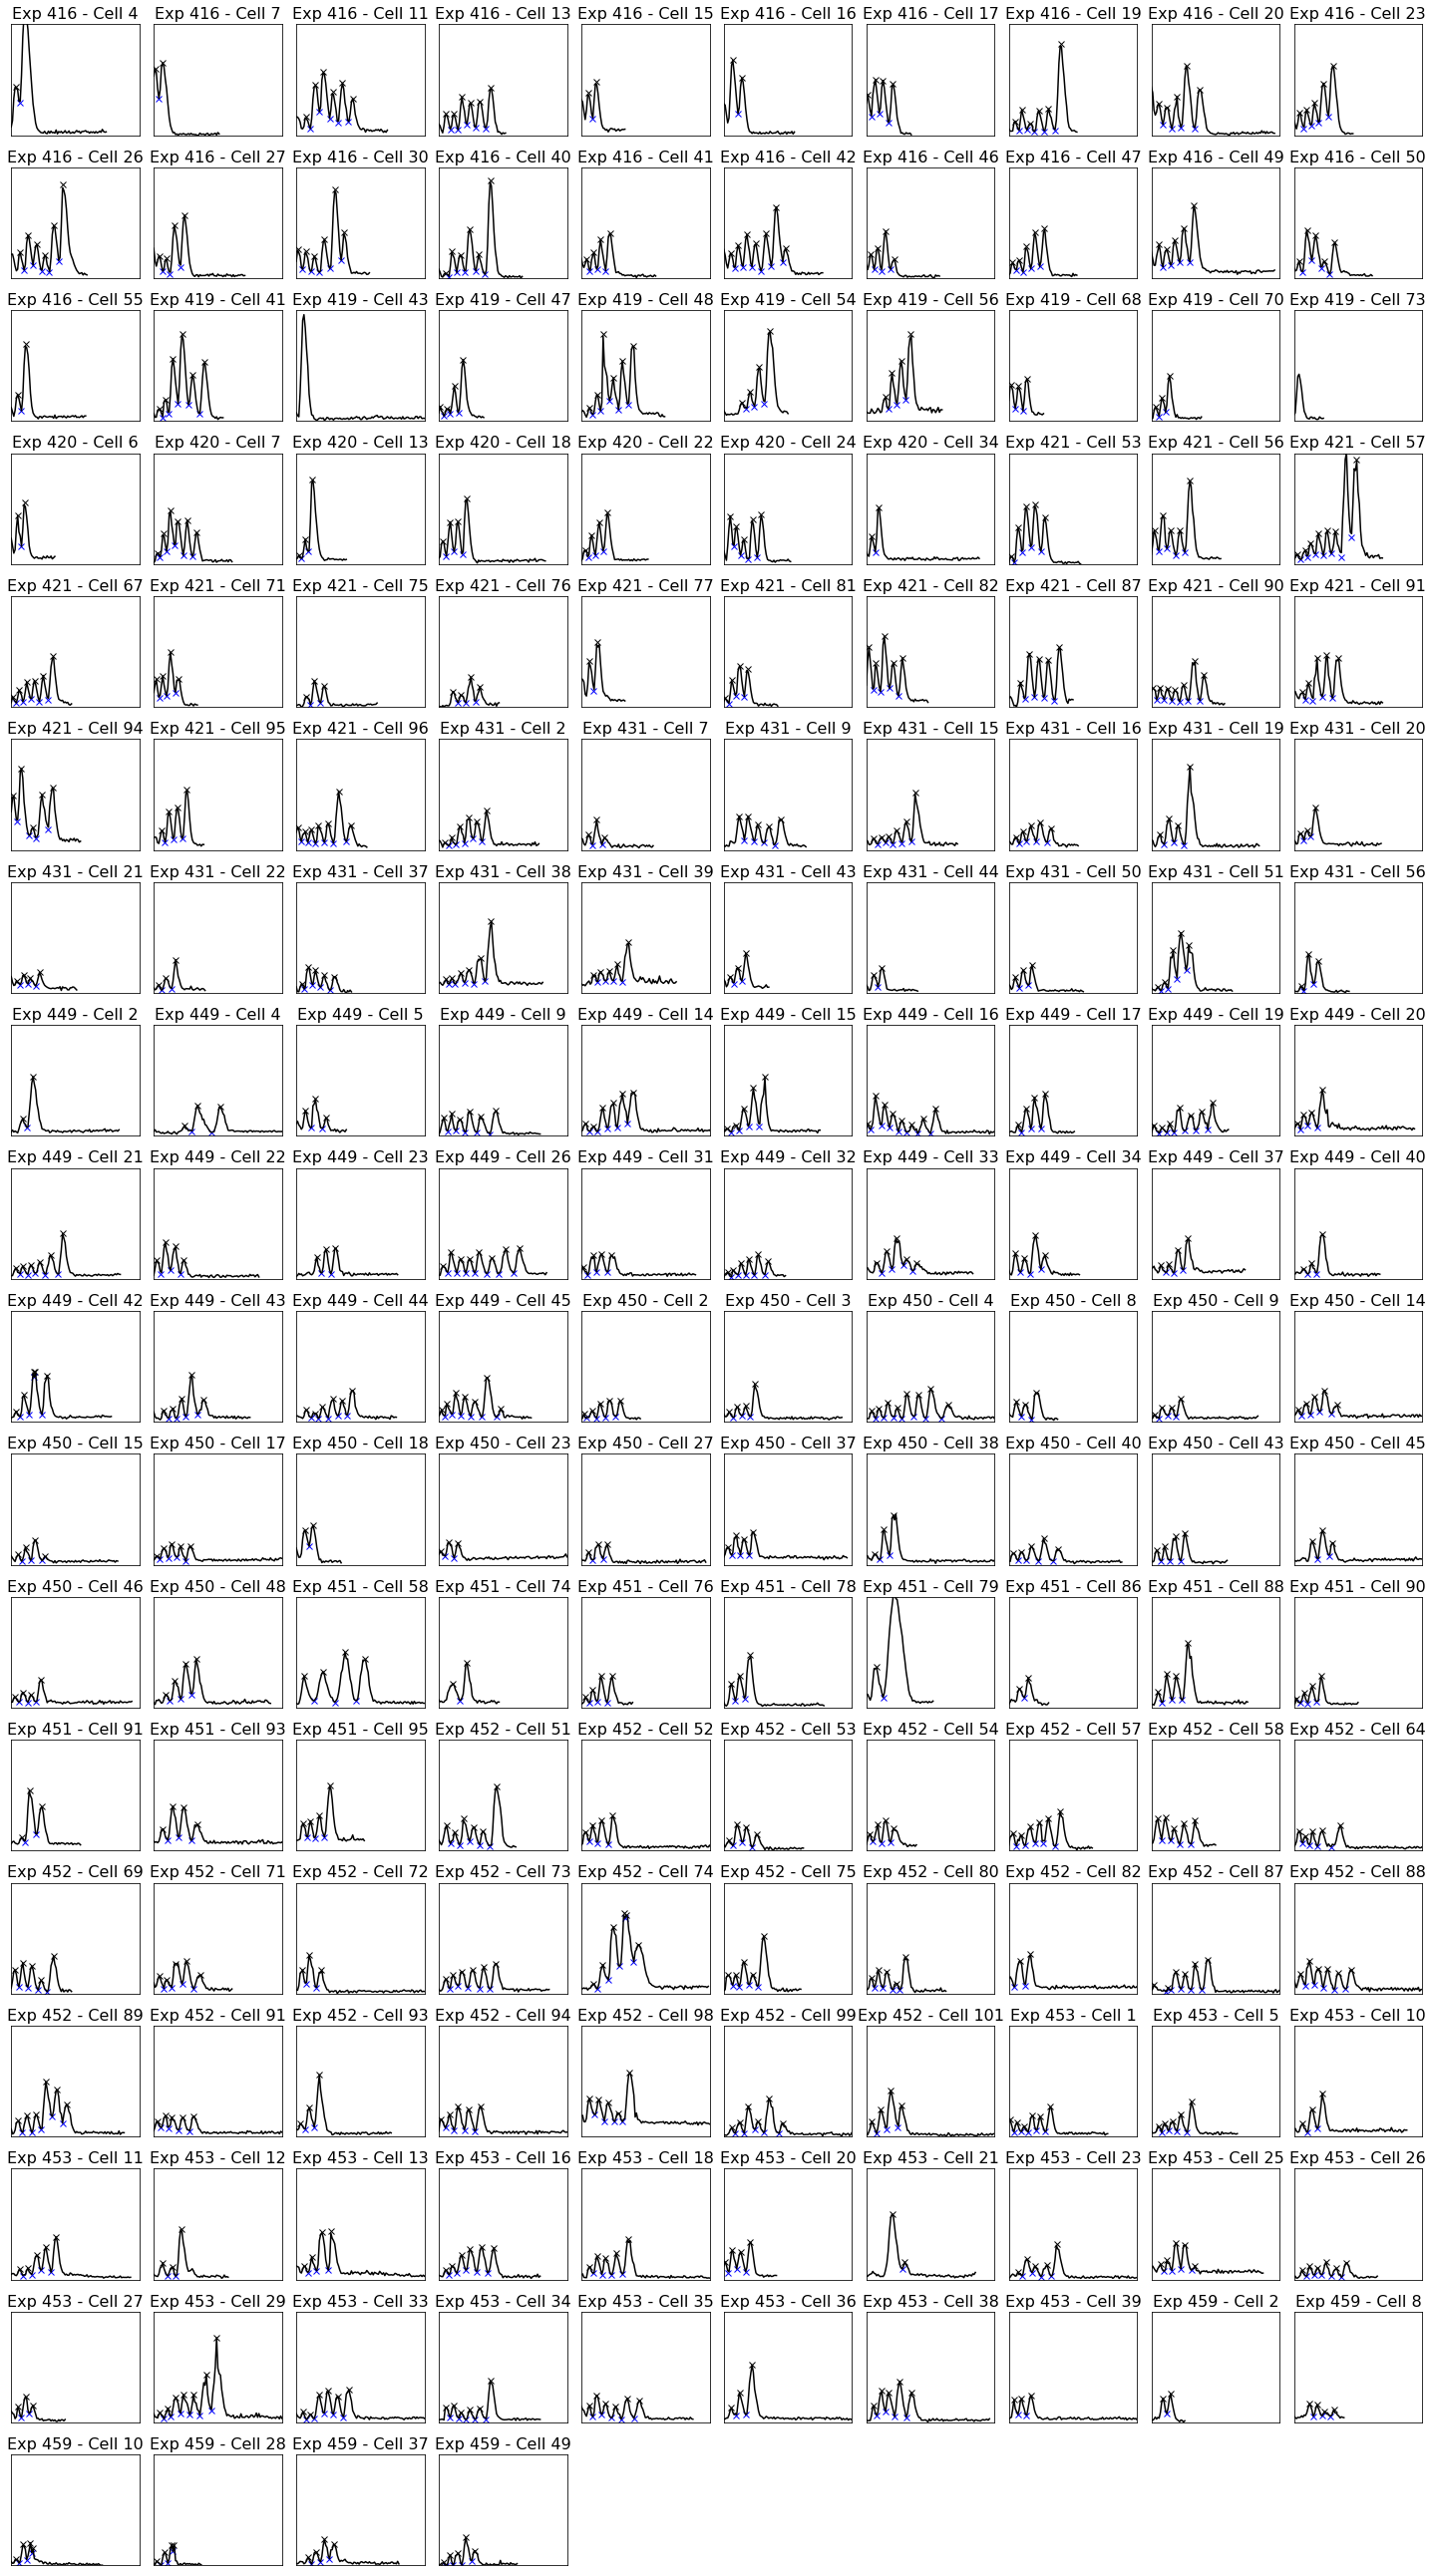

In [7]:
n_experiments = len(np.unique(experiments))

# Number of cells per experiments
cells_per_exp = []
experiments_id = np.unique(experiments)

for i in range(n_experiments):
    aux = np.where(experiments_id[i]==experiments)[0]
    cells_per_exp.append(len(aux))
    
# Plot peaks (max) and troughs (min) according to experiment
count = 0

n_cols =  10
n_rows = np.ceil((len(cells_id) + 1) / n_cols)
plot_num = 1

# Initialize the figure size
size_x = 2*n_cols
size_y = 2*n_rows

fig = plt.figure(figsize=[size_x,size_y])

# Save the period values
periods_all = []
period_posterior = []
period_anterior = []

for i,val1 in enumerate(np.unique(experiments)):
    

    for j,val2 in enumerate(cells_id_per_exp[i]):
        
        ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
        plot_num += 1
        
        max_val = maxima_df[val1][val2].dropna().to_numpy()
        min_val = minima_df[val1][val2].dropna().to_numpy()
        max_time = max_times_df[val1][val2].dropna().to_numpy()
        min_time = min_times_df[val1][val2].dropna().to_numpy()
        intensity_l = looping_df[val1][val2].dropna().to_numpy()
        intensity_m = mesp_df[val1][val2].dropna().to_numpy()
        
        # Period is the difference between two maxima times
        periods_all += np.diff(max_time).tolist()
        if np.size(max_time)>1:
            period_posterior += np.diff(max_time)[0]
            period_anterior += np.diff(max_time)[-1]
            
        
        if np.size(max_val)>0:

            ax.plot(max_time-10, max_val, "xk"); plt.plot(min_time-10, min_val, "xb"); 
            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='k'); 
            
            ax.set_title('Exp %d - Cell %d'%(val1, val2), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])

            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])
            

        else:

            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='k'); 
            
            ax.set_title('Exp %d - Cell %d'%(val1, val2), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])

            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])

            
plt.tight_layout()
            
fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Results/LoopinPeaksTroughs-All.pdf', format='pdf', bbox_inches='tight')

In [8]:
print('The average period is: %.2f'%(np.mean(periods_all)))
print('The median period is: %.2f'%(np.median(periods_all)))
print('The SD period is: %.2f'%(np.std(periods_all)))

The average period is: 71.35
The median period is: 69.71
The SD period is: 16.19


### Avergae periods

In [9]:
# Save the period values
periods_all = []
posterior_period = []
anterior_period = []
last_peak_time = []

for i,val1 in enumerate(np.unique(experiments)):
    

    for j,val2 in enumerate(cells_id_per_exp[i]):
        
        max_val = maxima_df[val1][val2].dropna().to_numpy()
        min_val = minima_df[val1][val2].dropna().to_numpy()
        max_time = max_times_df[val1][val2].dropna().to_numpy()
        min_time = min_times_df[val1][val2].dropna().to_numpy()
        intensity_l = looping_df[val1][val2].dropna().to_numpy()
        intensity_m = mesp_df[val1][val2].dropna().to_numpy()
        
        # Period is the difference between two maxima times
        periods_all += np.diff(max_time).tolist()
        last_peak_time += [max_time[-1]]
        if np.size(max_time)>1:
            posterior_period += [np.diff(max_time)[0]]
            anterior_period += [np.diff(max_time)[-1]]


Mean Posterior Period = 62.58
Standard deviation Posterior Period = 13.56 

Mean Anterior Period = 81.58
Standard deviation Anterior Period = 18.42


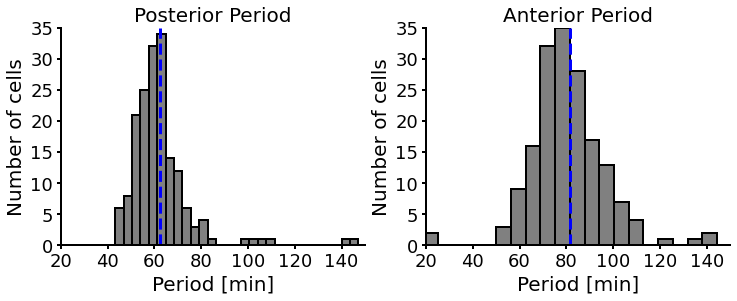

In [10]:
fig = plt.figure(figsize=[12,4])

        
print('Mean Posterior Period = %.2f'%np.mean(posterior_period))
print('Standard deviation Posterior Period = %.2f'%np.std(posterior_period), '\n')
print('Mean Anterior Period = %.2f'%np.mean(anterior_period))
print('Standard deviation Anterior Period = %.2f'%np.std(anterior_period))

# Plot the periods
plt.subplot(121)
plt.hist(posterior_period, bins='fd', edgecolor='black', linewidth=2, color='gray');
plt.axvline(np.mean(posterior_period), linewidth=3, color='blue', linestyle='--')
plt.xlabel('Period [min]', fontsize=20)
plt.ylabel('Number of cells', fontsize=20)
plt.ylim([0,35])
plt.xlim([20,150])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);
plt.title('Posterior Period', fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


plt.subplot(122)
plt.hist(anterior_period, bins='fd', edgecolor='black', linewidth=2, color='gray');
plt.axvline(np.mean(anterior_period), linewidth=3, color='blue', linestyle='--')
plt.xlabel('Period [min]', fontsize=20)
plt.ylabel('Number of cells', fontsize=20)
plt.ylim([0,35])
plt.xlim([20,150])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);
plt.title('Anterior Period', fontsize=20);
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
plt.show()

fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Results/PeriodsAnteriorVsPosterior.pdf', format='pdf', bbox_inches='tight')

### Adjusted Last Her1 Peak Times

These times were adjusted so the 0 stands for the seeding time and not the start of the movie. 

In [11]:
# Adjusted last peak times
last_peak_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/LastPeak(adj)_PSM4_checked.xlsx', header=[0,1])
last_peak_time = last_peak_df.iloc[1][1:].dropna().to_numpy()

Mean Last peak time = 372.90
Standard deviation Last peak time = 113.79


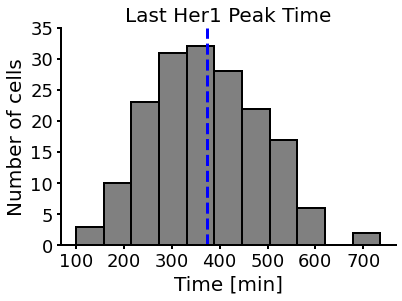

In [12]:
# Last peak Time

print('Mean Last peak time = %.2f'%np.mean(last_peak_time))
print('Standard deviation Last peak time = %.2f'%np.std(last_peak_time))

fig = plt.figure(figsize=[6,4])
plt.hist(last_peak_time, bins='fd', edgecolor='black', linewidth=2, color='gray');
plt.axvline(np.mean(last_peak_time), linewidth=3, color='blue', linestyle='--')
plt.xlabel('Time [min]', fontsize=20)
plt.ylabel('Number of cells', fontsize=20)
plt.ylim([0,35])
#plt.xlim([20,150])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);
plt.title('Last Her1 Peak Time', fontsize=20);
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Results/Her1LastPeakTime.pdf', format='pdf', bbox_inches='tight')

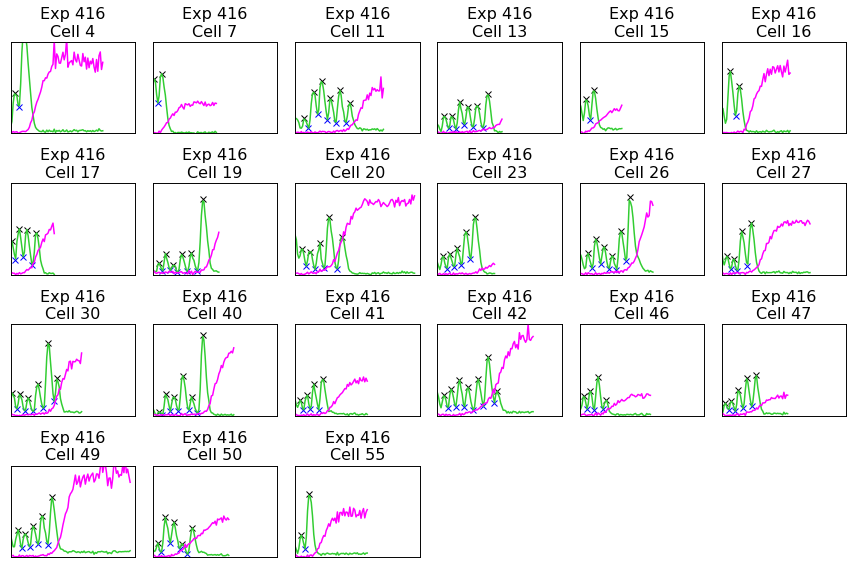

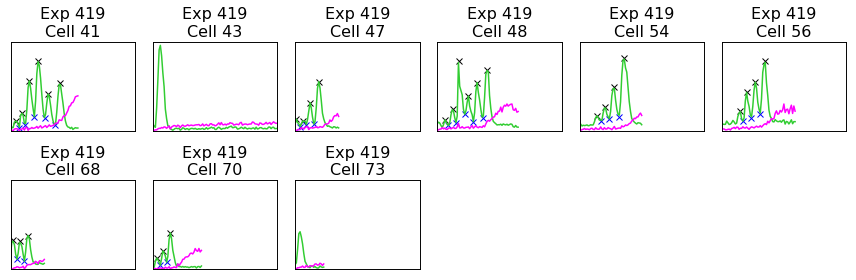

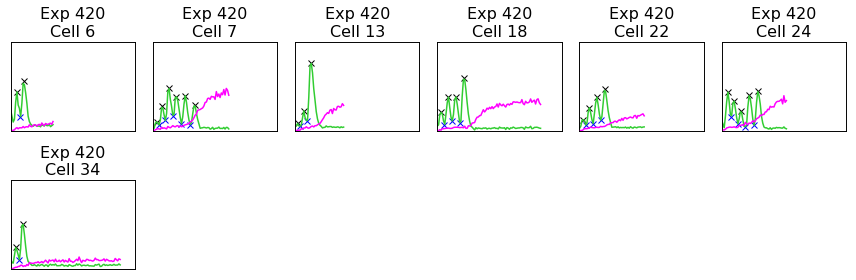

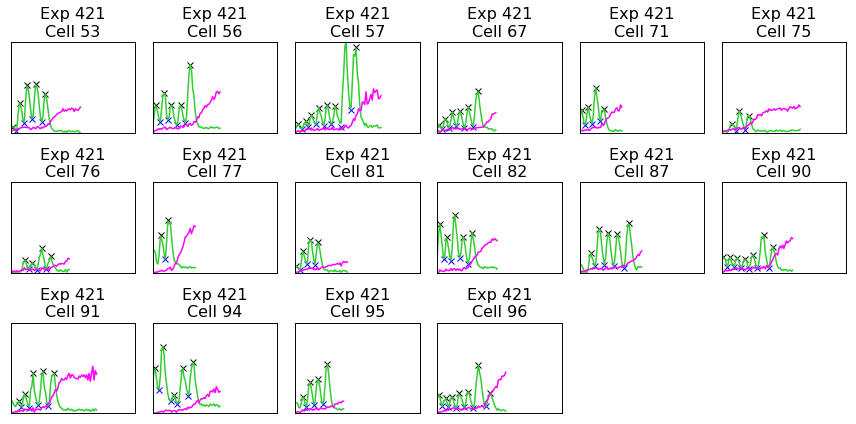

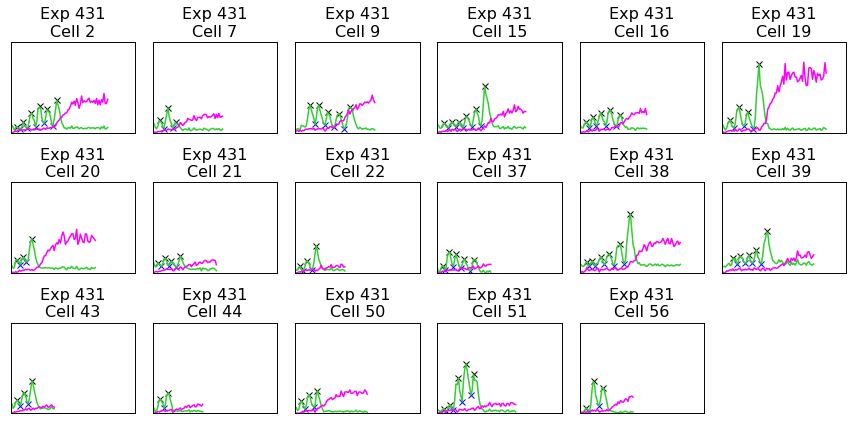

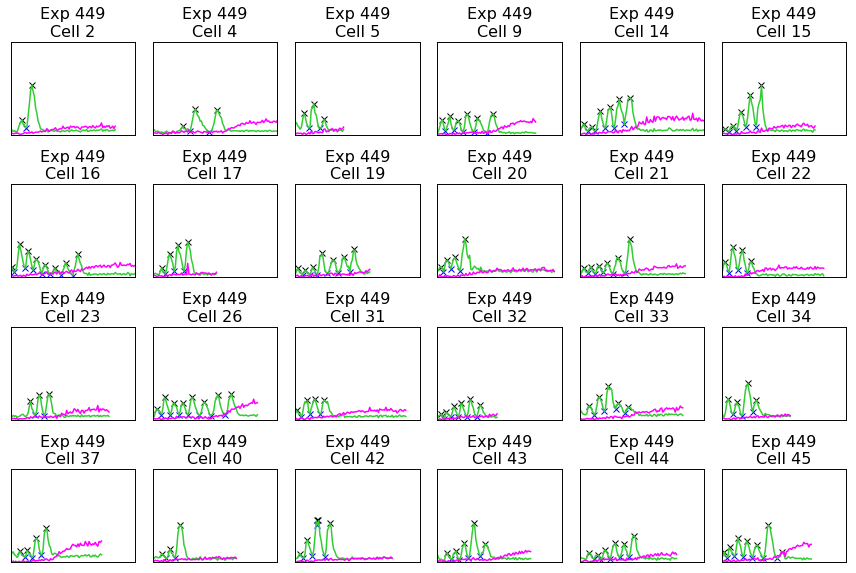

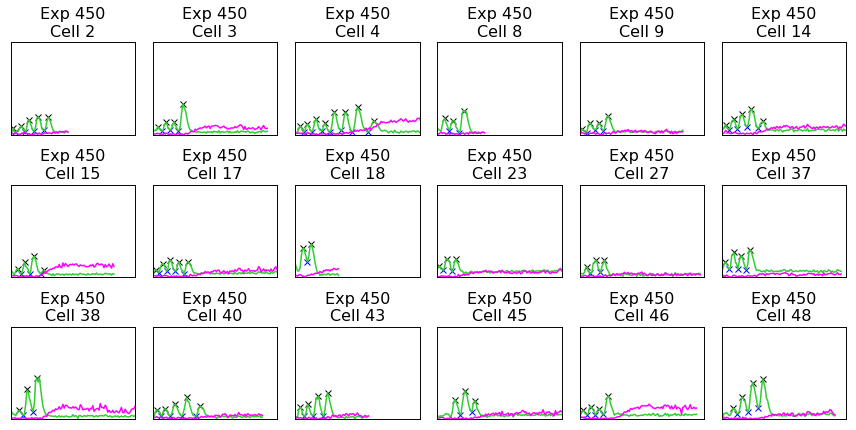

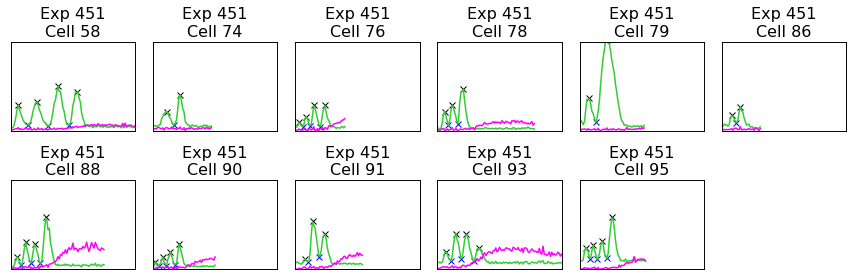

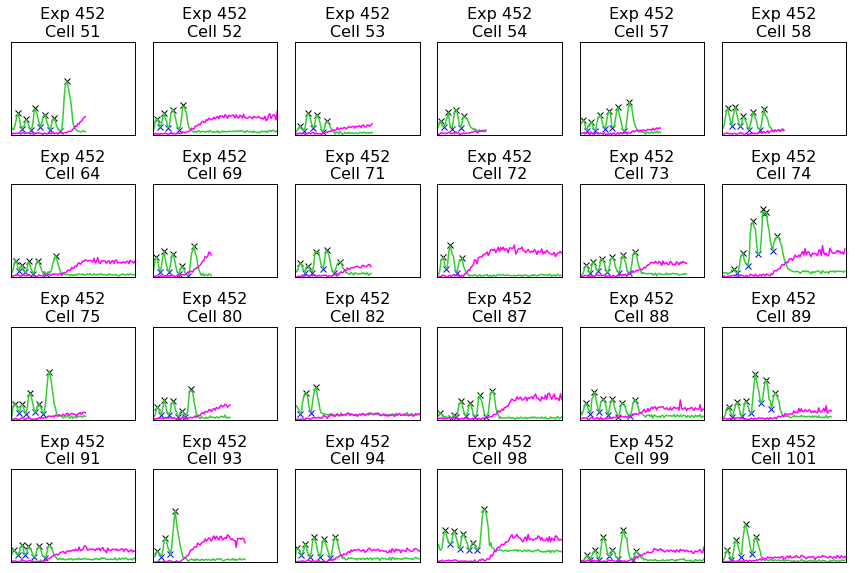

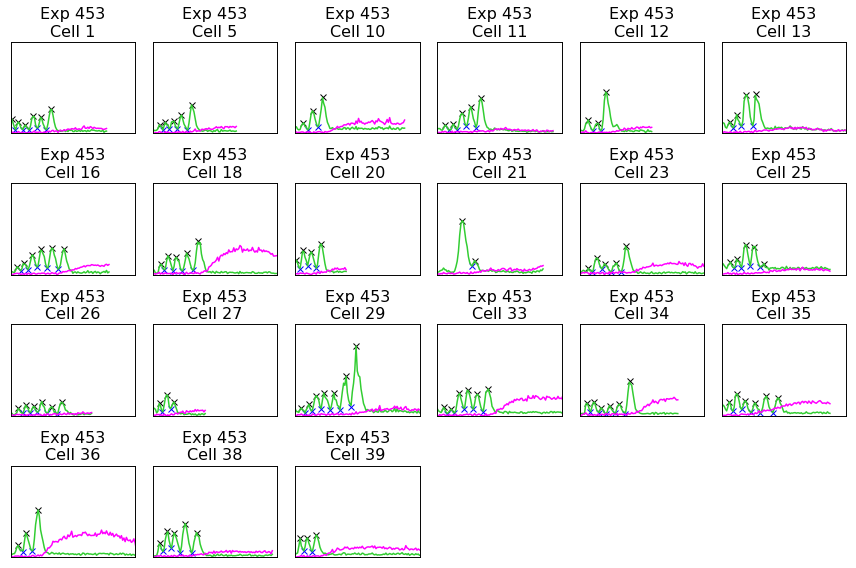

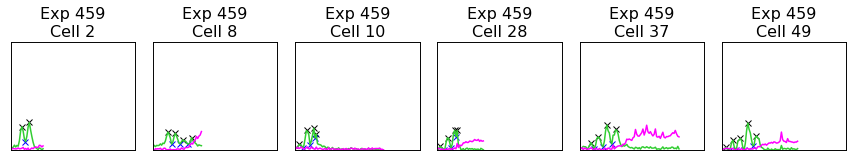

In [13]:
n_experiments = len(np.unique(experiments))

# Number of cells per experiments
cells_per_exp = []
experiments_id = np.unique(experiments)

for i in range(n_experiments):
    aux = np.where(experiments_id[i]==experiments)[0]
    cells_per_exp.append(len(aux))
    
# Plot peaks (max) and troughs (min) according to experiment
count = 0

for i,val1 in enumerate(np.unique(experiments)):
    
    n_cols =  6
    n_rows = np.ceil((len(cells_id_per_exp[i]) + 1) / n_cols)      

    plot_num = 1
    

    #size_fig = n_rows*(20/n_cols)
    # Initialize the figure size
    size_x = 2*n_cols
    size_y = n_rows*2
    
    fig = plt.figure(figsize=[size_x,size_y])

    for j,val2 in enumerate(cells_id_per_exp[i]):
        
        
        max_val = maxima_df[val1][val2].dropna().to_numpy()
        min_val = minima_df[val1][val2].dropna().to_numpy()
        max_time = max_times_df[val1][val2].dropna().to_numpy()
        min_time = min_times_df[val1][val2].dropna().to_numpy()
        intensity_l = looping_df[val1][val2].dropna().to_numpy()
        intensity_m = mesp_df[val1][val2].dropna().to_numpy()
        
        # Update the number of subplots    
        ax = plt.subplot(int(n_rows), n_cols, plot_num)
        plot_num += 1
            
        if np.size(max_val)>0:

            ax.plot(max_time-10, max_val, "xk"); plt.plot(min_time-10, min_val, "xb"); 
            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='limegreen'); 
            
            ax2=ax.twinx()
            ax2.plot(np.arange(len(intensity_m))*10, intensity_m-np.min(intensity_m), color='magenta');
            ax.set_title('Exp %d\nCell %d'%(val1, val2), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])
            ax2.set_xticks([])
            ax2.set_yticks([])
            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])
            ax2.set_ylim([0,1500])
            
            plt.tight_layout()
        else:


            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='limegreen'); 
            
            ax2=ax.twinx()
            ax2.plot(np.arange(len(intensity_m))*10, intensity_m-np.min(intensity_m), color='magenta');
            ax.set_title('Exp %d\nCell %d'%(val1, val2), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])
            ax2.set_xticks([])
            ax2.set_yticks([])
            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])
            ax2.set_ylim([0, 1500])
            
            plt.tight_layout()
            
        count += 1  
        
    fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Results/LoopinMespPeaksTroughs_Exp%d.pdf'%val1, format='pdf', bbox_inches='tight')
        

In [14]:
print(np.unique(experiments))

[416 419 420 421 431 449 450 451 452 453 459]


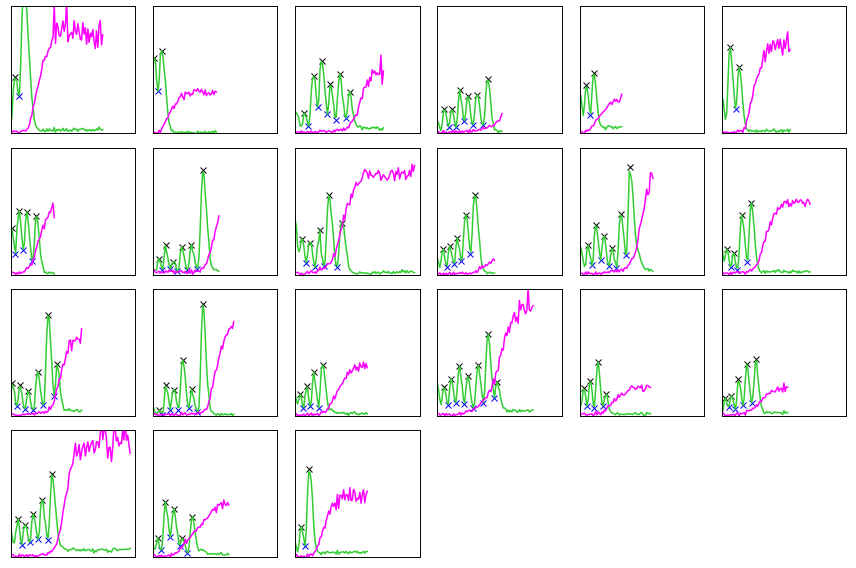

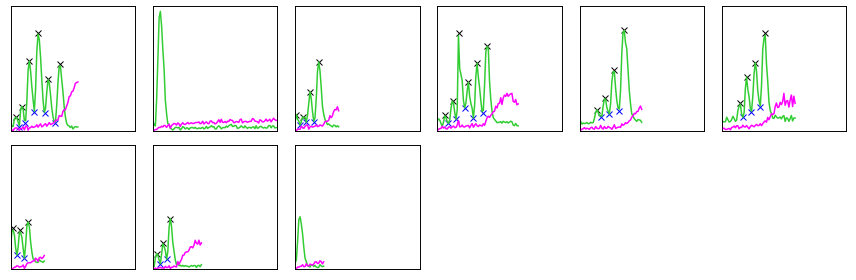

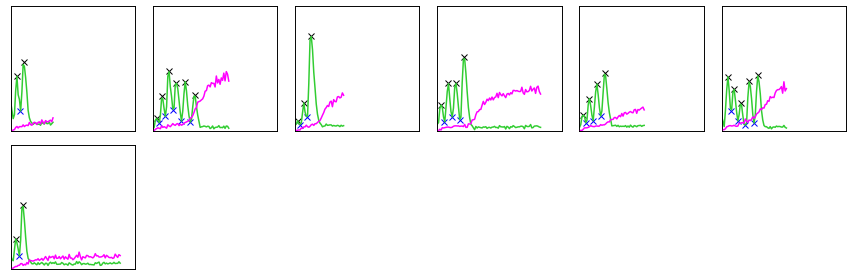

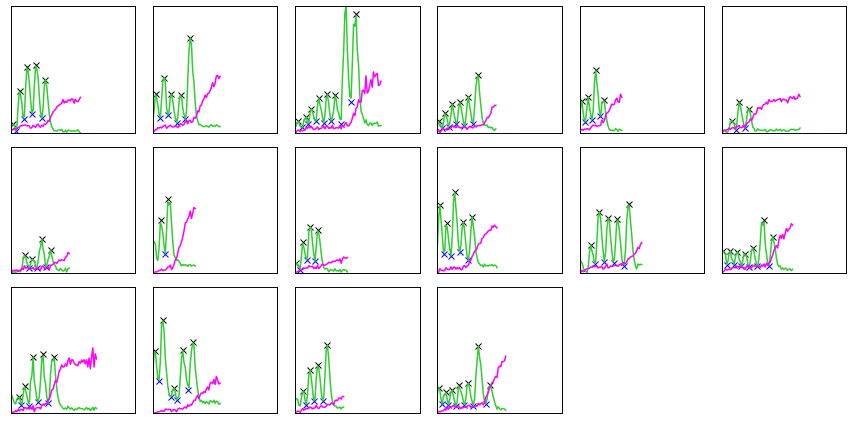

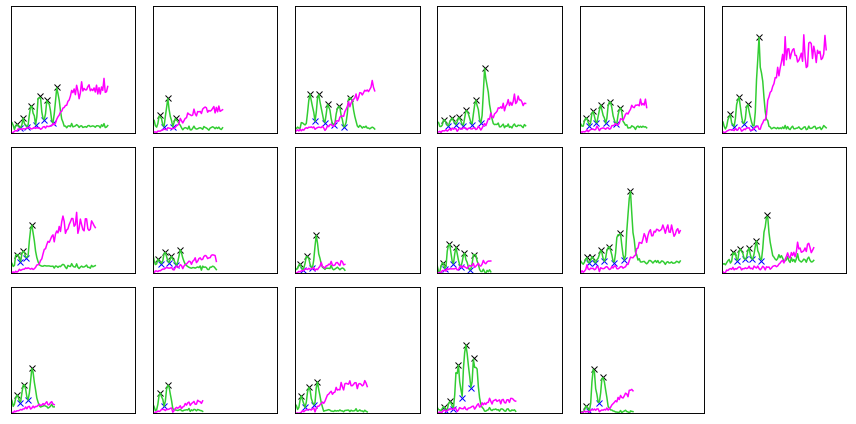

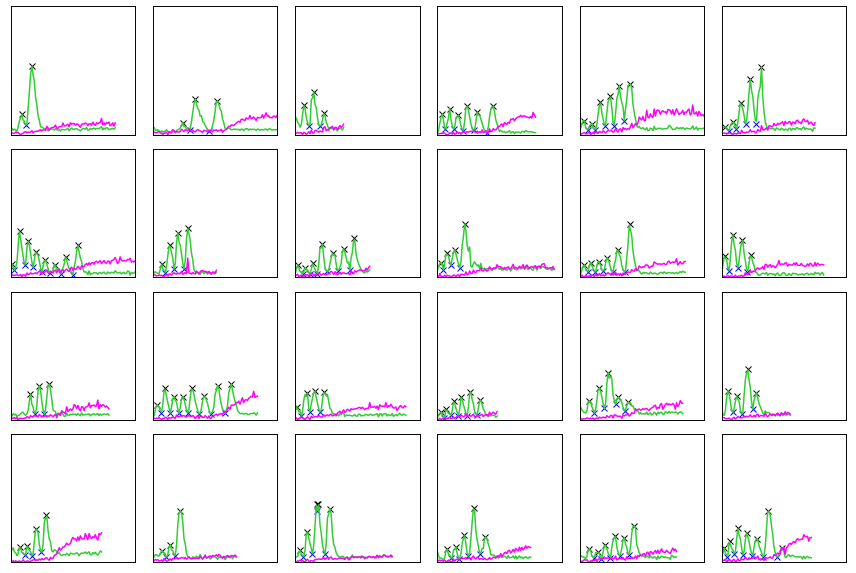

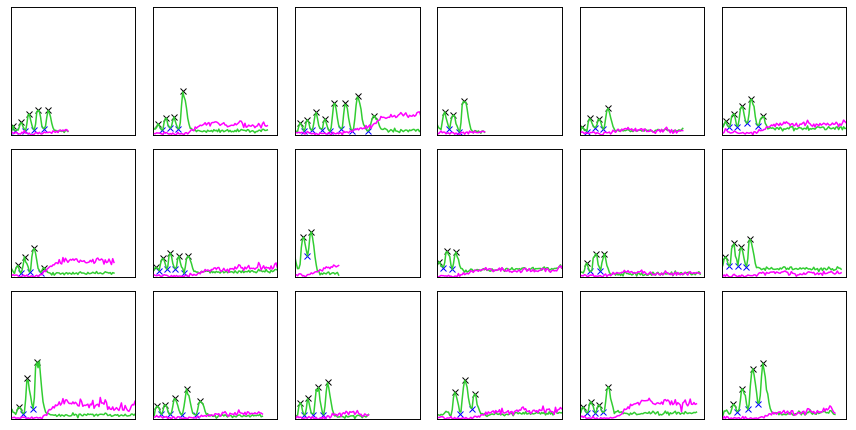

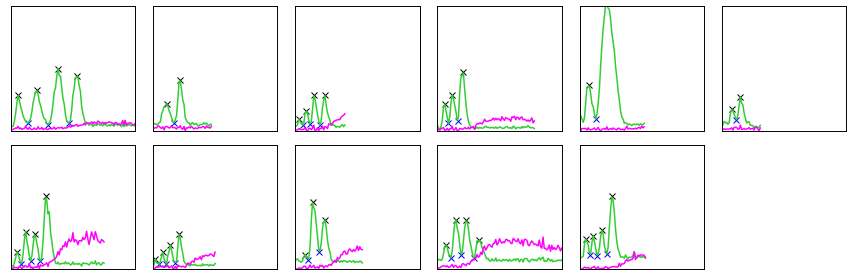

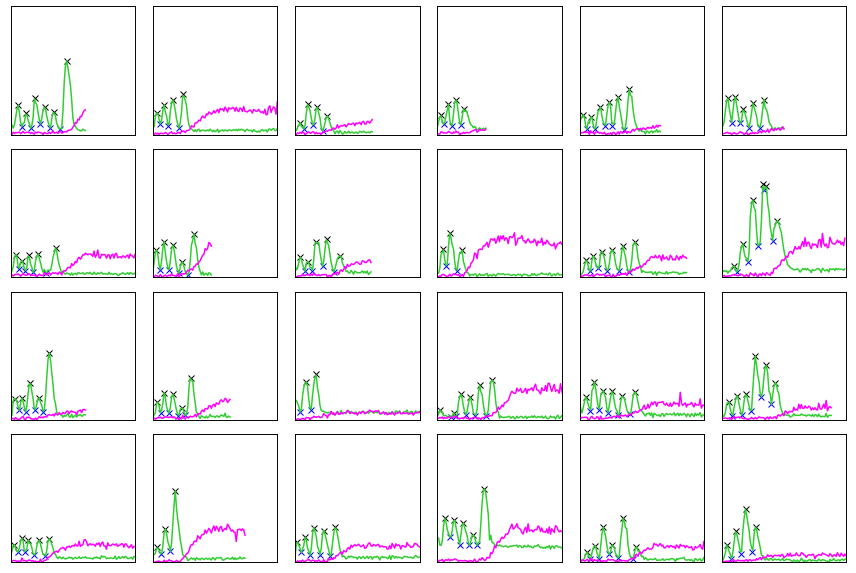

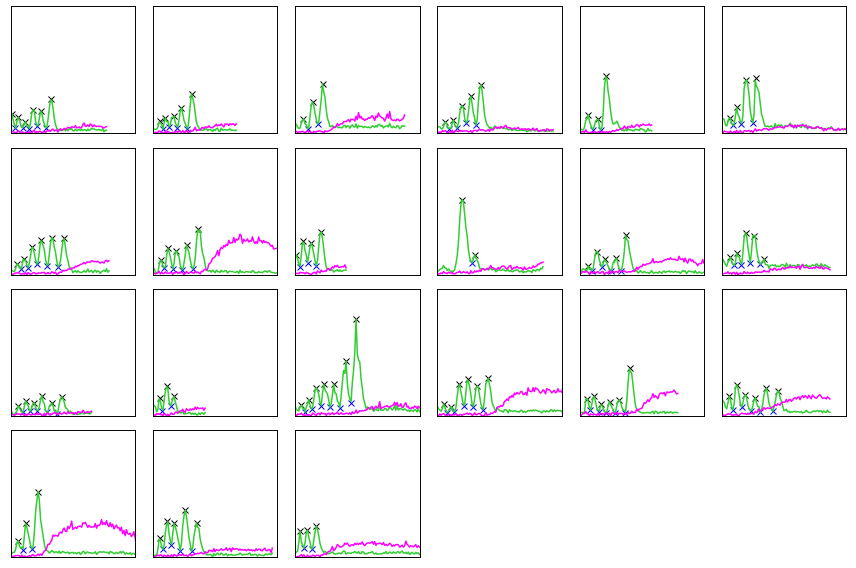

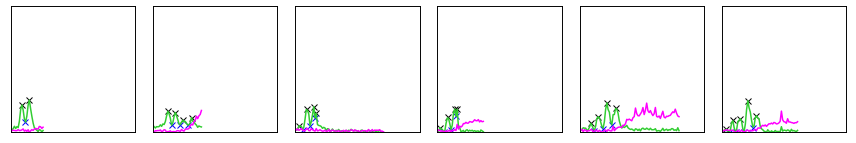

In [15]:
n_experiments = len(np.unique(experiments))

# Number of cells per experiments
cells_per_exp = []
experiments_id = np.unique(experiments)

for i in range(n_experiments):
    aux = np.where(experiments_id[i]==experiments)[0]
    cells_per_exp.append(len(aux))
    
# Plot peaks (max) and troughs (min) according to experiment
count = 0

for i,val1 in enumerate(np.unique(experiments)):
    
    n_cols =  6
    n_rows = np.ceil((len(cells_id_per_exp[i]) + 1) / n_cols)      

    plot_num = 1
    

    #size_fig = n_rows*(20/n_cols)
    # Initialize the figure size
    size_x = 2*n_cols
    size_y = n_rows*2
    
    fig = plt.figure(figsize=[size_x,size_y])

    for j,val2 in enumerate(cells_id_per_exp[i]):
        
        
        max_val = maxima_df[val1][val2].dropna().to_numpy()
        min_val = minima_df[val1][val2].dropna().to_numpy()
        max_time = max_times_df[val1][val2].dropna().to_numpy()
        min_time = min_times_df[val1][val2].dropna().to_numpy()
        intensity_l = looping_df[val1][val2].dropna().to_numpy()
        intensity_m = mesp_df[val1][val2].dropna().to_numpy()
        
        # Update the number of subplots    
        ax = plt.subplot(int(n_rows), n_cols, plot_num)
        plot_num += 1
            
        if np.size(max_val)>0:

            ax.plot(max_time-10, max_val, "xk"); plt.plot(min_time-10, min_val, "xb"); 
            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='limegreen'); 
            
            ax2=ax.twinx()
            ax2.plot(np.arange(len(intensity_m))*10, intensity_m-np.min(intensity_m), color='magenta');
            #ax.set_title('Exp %d\nCell %d'%(val1, val2), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])
            ax2.set_xticks([])
            ax2.set_yticks([])
            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])
            ax2.set_ylim([0,1500])
            
            plt.tight_layout()
        else:


            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='limegreen'); 
            
            ax2=ax.twinx()
            ax2.plot(np.arange(len(intensity_m))*10, intensity_m-np.min(intensity_m), color='magenta');
            #ax.set_title('Exp %d\nCell %d'%(val1, val2), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])
            ax2.set_xticks([])
            ax2.set_yticks([])
            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])
            ax2.set_ylim([0, 1500])
            
            plt.tight_layout()
            
        count += 1  
        
    fig.savefig('../../Figures Linked Alt Version Nov 2021/ABR_Edits/LoopinMespPeaksTroughs_Exp%d.pdf'%val1, format='pdf', bbox_inches='tight')
        

## How is the peak number variability between experiments? 

How is the intra and inter experimental variability. Check how are the number of peaks in each experiment to confirm that the variability comes not due to solely differences between individual embryos/experiments. 

Exp 419: Mean = 3.81 - Std = 1.79
Exp 450: Mean = 3.44 - Std = 0.83
Exp 449: Mean = 5.71 - Std = 1.39
Exp 420: Mean = 4.88 - Std = 1.54
Exp 421: Mean = 4.47 - Std = 1.54
Exp 451: Mean = 4.21 - Std = 1.22
Exp 452: Mean = 4.61 - Std = 1.34
Exp 459: Mean = 3.91 - Std = 1.62
Exp 416: Mean = 4.75 - Std = 1.20
Exp 431: Mean = 4.29 - Std = 1.39
Exp 453: Mean = 4.83 - Std = 1.34


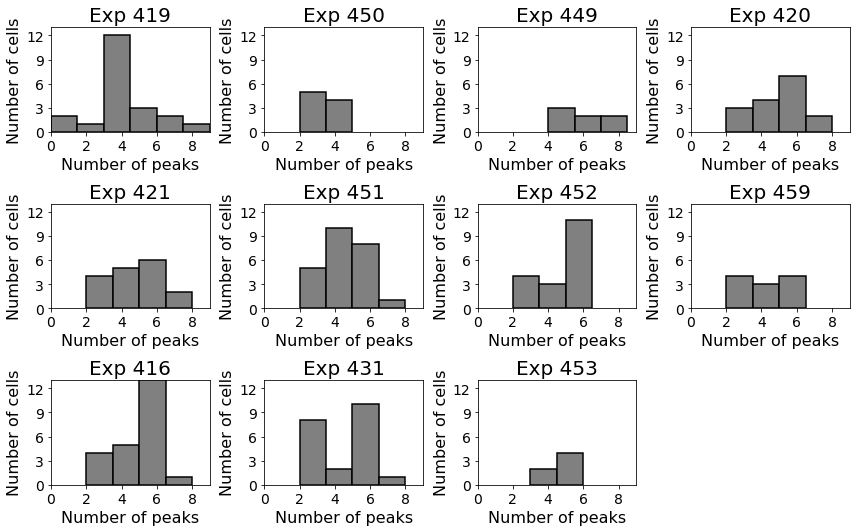

In [16]:
n_cols =  4
n_rows = np.ceil((n_experiments + 1) / n_cols)
plot_num = 1

size_fig = n_rows*(10/n_cols)
# Initialize the figure size
fig = plt.figure(figsize=[12,size_fig])
count = 0 
binwidth = 1.5
indexes = np.unique(experiments, return_index=True)[1]
exps_id = [experiments[index] for index in sorted(indexes)]
cov_peak_nums = []
all_peaks_nums = []
for i in range(n_experiments):
    
    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1
    aux = []
    for j in range(cells_per_exp[i]):
        max_val = maxima_df[experiments[count]][cells_id[count]].dropna().to_numpy()
        aux.append(len(max_val))
        count+=1
    print('Exp %d: Mean = %.2f - Std = %.2f'%(exps_id[i], np.mean(aux), np.std(aux)))
    cov_peak_nums.append(np.std(aux)/np.mean(aux))
    all_peaks_nums+= aux
    plt.hist(aux, color='grey', edgecolor='black', linewidth=1.5,
            bins=np.arange(min(aux), max(aux) + binwidth, binwidth))
    plt.xticks(np.arange(0,9,2), fontsize=14)
    plt.xlim([0,9])
    plt.yticks(np.arange(0,15,3), fontsize=14)
    plt.ylim([0,13])
    plt.title('Exp %d'%exps_id[i], fontsize=20)
    plt.xlabel('Number of peaks', fontsize=16)
    plt.ylabel('Number of cells', fontsize=16)
    
plt.tight_layout()
plt.show()
fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Results/PeakNumber-PerExperiment.pdf', format='pdf', bbox_inches='tight')

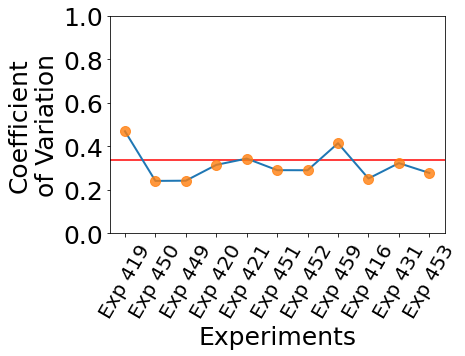

In [17]:
# Coefficient of variation
fig = plt.figure(figsize=[6,4])
labels = []
for i in range(n_experiments):
    labels.append('Exp %d'%exps_id[i])


plt.axhline(np.std(all_peaks_nums)/np.mean(all_peaks_nums), color='red')
plt.plot(cov_peak_nums, linewidth=2)
plt.plot(cov_peak_nums, 'o', markersize=10, alpha=0.8)
plt.ylim([0,1])
plt.xlabel('Experiments', fontsize=25)
plt.xticks(np.arange(0,11,1), labels, fontsize=20, rotation=60)
plt.yticks(fontsize=25);
plt.ylabel('Coefficient\nof Variation', fontsize=25)
fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Results/PeakNumber-PerExperiment-COV.pdf', format='pdf', bbox_inches='tight')

Exp 419: Mean = 261.42 - Std = 131.36
Exp 450: Mean = 302.79 - Std = 99.77
Exp 449: Mean = 393.70 - Std = 105.40
Exp 420: Mean = 344.78 - Std = 118.69
Exp 421: Mean = 272.05 - Std = 104.02
Exp 451: Mean = 310.37 - Std = 90.02
Exp 452: Mean = 328.49 - Std = 108.07
Exp 459: Mean = 248.41 - Std = 127.10
Exp 416: Mean = 315.40 - Std = 94.86
Exp 431: Mean = 299.98 - Std = 96.71
Exp 453: Mean = 344.80 - Std = 103.65


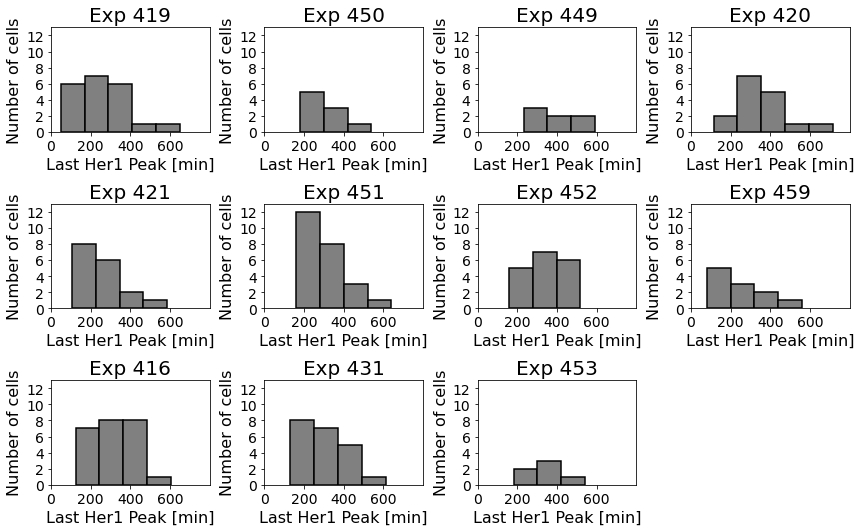

In [18]:
n_cols =  4
n_rows = np.ceil((n_experiments + 1) / n_cols)
plot_num = 1

size_fig = n_rows*(10/n_cols)
# Initialize the figure size
fig = plt.figure(figsize=[12,size_fig])
count = 0 
binwidth = 120
indexes = np.unique(experiments, return_index=True)[1]
exps_id = [experiments[index] for index in sorted(indexes)]

cov_peak_times = []
all_peaks_times = []

for i in range(n_experiments):
    
    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1
    aux = []
    for j in range(cells_per_exp[i]):
        max_times = max_times_df[experiments[count]][cells_id[count]].dropna().to_numpy()
        aux.append(max_times[-1])
        count+=1
        
    print('Exp %d: Mean = %.2f - Std = %.2f'%(exps_id[i], np.mean(aux), np.std(aux)))
    cov_peak_times.append(np.std(aux)/np.mean(aux)) 
    all_peaks_times+= aux
    plt.hist(aux, color='grey', edgecolor='black', linewidth=1.5,
            bins=np.arange(min(aux), max(aux) + binwidth, binwidth))
    plt.xticks(np.arange(0,800,200), fontsize=14)
    plt.xlim([0,800])
    plt.yticks(np.arange(0,14,2), fontsize=14)
    plt.ylim([0,13])
    plt.title('Exp %d'%exps_id[i], fontsize=20)
    plt.xlabel('Last Her1 Peak [min]', fontsize=16)
    plt.ylabel('Number of cells', fontsize=16)
    
plt.tight_layout()
plt.show()

fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Results/LastPeakTimes-PerExperiment.pdf', format='pdf', bbox_inches='tight')

In [ ]:
# Coefficient of variation
fig = plt.figure(figsize=[6,4])

labels = []
for i in range(n_experiments):
    labels.append('Exp %d'%exps_id[i])


plt.axhline(np.std(all_peaks_times)/np.mean(all_peaks_times), color='red')
plt.plot(cov_peak_nums, linewidth=2)
plt.plot(cov_peak_nums, 'o', markersize=10, alpha=0.8)
plt.ylim([0,1])
plt.xlabel('Experiments', fontsize=25)
plt.xticks(np.arange(0,11,1), labels, fontsize=20, rotation=60)
plt.yticks(fontsize=25);
plt.ylabel('Coefficient\nof Variation', fontsize=25)
fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Results/PeakTimes-PerExperiment-COV.pdf', format='pdf', bbox_inches='tight')

## Only-Looping Cells

<a id='looponly'></a>

If you want to go to the top of the notebook: [TOP](#top)

In [ ]:
looping_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/PSM4_LoopingOnly_checked/Looping ONLYIntensity_checked.xlsx', header=[0,1], )
periods_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/PSM4_LoopingOnly_checked/Looping_only_PSM4_Extrema_checked.xlsx', header=[0,1], sheet_name='Period')
maxima_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/PSM4_LoopingOnly_checked/Looping_only_PSM4_Extrema_checked.xlsx', header=[0,1], sheet_name='Maxima Intensity')
minima_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/PSM4_LoopingOnly_checked/Looping_only_PSM4_Extrema_checked.xlsx', header=[0,1], sheet_name='Minima Intensity')
max_times_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/PSM4_LoopingOnly_checked/Looping_only_PSM4_Extrema_checked.xlsx', header=[0,1], sheet_name='Maxima Time')
min_times_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/PSM4_LoopingOnly_checked/Looping_only_PSM4_Extrema_checked.xlsx', header=[0,1], sheet_name='Minima Time')

T_plus_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/PSM4_LoopingOnly_checked/Looping_only_PSM4_Extrema_checked.xlsx', header=[0,1], sheet_name='T+')
T_minus_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/PSM4_LoopingOnly_checked/Looping_only_PSM4_Extrema_checked.xlsx', header=[0,1], sheet_name='T-')

In [ ]:
# Remove columns which are empty (no headers)
looping_df = looping_df[looping_df.columns.dropna()]
maxima_df = maxima_df[maxima_df.columns.dropna()]
minima_df = minima_df[minima_df.columns.dropna()]
max_times_df = max_times_df[max_times_df.columns.dropna()]
min_times_df = min_times_df[min_times_df.columns.dropna()]
T_plus_df = T_plus_df[T_plus_df.columns.dropna()]
T_minus_df = T_minus_df[T_minus_df.columns.dropna()]

In [ ]:
experiments = []
cells_id = []

# Arrange experiments and cells
for i in range(1,len(looping_df.keys())):
    
    if type(looping_df.keys()[i][1]) == int:
    
        # Save the number of the experiment for each cell
        experiments.append(looping_df.keys()[i][0])
        # Save the cell id
        cells_id.append(looping_df.keys()[i][1])
    
print('Number of experiments: %d'%len(np.unique(experiments)))
print('Number of cells in total: %d'%len(cells_id))

In [ ]:
n_experiments = len(np.unique(experiments))

# Number of cells per experiments
cells_per_exp = []
experiments_id = np.unique(experiments)

for i in range(n_experiments):
    aux = np.where(experiments_id[i]==experiments)[0]
    cells_per_exp.append(len(aux))
    
# Plot peaks (max) and troughs (min) according to experiment
count = 0


for i in range(n_experiments):
    
    n_cols =  5
    n_rows = np.ceil((cells_per_exp[i] + 1) / n_cols)
    plot_num = 1
    
    size_fig = n_rows*(11/n_cols)
    # Initialize the figure size
    fig = plt.figure(figsize=[11,size_fig])

    for j in range(cells_per_exp[i]):
        
        max_val = maxima_df[experiments[count]][cells_id[count]].dropna().to_numpy()
        min_val = minima_df[experiments[count]][cells_id[count]].dropna().to_numpy()
        max_time = max_times_df[experiments[count]][cells_id[count]].dropna().to_numpy()
        min_time = min_times_df[experiments[count]][cells_id[count]].dropna().to_numpy()
        intensity_l = looping_df[experiments[count]][cells_id[count]].dropna().to_numpy()
        
        if np.size(max_val)>0:
        
            # Update the number of subplots    
            ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
            plot_num += 1

            ax.plot(max_time-10, max_val, "xk"); plt.plot(min_time-10, min_val, "xb"); 
            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='limegreen'); 
            
            ax.set_title('Exp %d - Cell %d'%(experiments[count], cells_id[count]), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])

            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])

            
            plt.tight_layout()
            
        fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Results/LoopingOnlyTroughs_Exp%d.pdf'%experiments[count], format='pdf', bbox_inches='tight')
        count +=1

### Number of peaks

In [ ]:
n_cycles = []
count = 0
for i in range(n_experiments):

    for j in range(cells_per_exp[i]):
        
        max_val = maxima_df[experiments[count]][cells_id[count]].dropna().to_numpy()
        
        n_cycles.append(len(max_val))
        count+=1

In [ ]:
print('Max number of cycles: %d'%np.max(n_cycles))

In [ ]:
fig = plt.figure(figsize=[6,4])
plt.hist(n_cycles, bins='fd', color='grey', edgecolor='k', linewidth=2, align='left');

plt.xticks([0,1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8,9], fontsize=25)
plt.yticks(fontsize=25)
plt.legend([])
plt.xlabel('Number of peaks', fontsize=30)
plt.ylabel('Number of cells', fontsize=30)
plt.ylim([0,25])

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
plt.title(' ')
plt.show()

fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Results/LoopingOnly-PeaksHistogram.pdf', bbox_inches='tight')

### Periods by cycle

In [ ]:
n_cycles = len(periods_df['Experiment']['Position'].dropna())

period_val_cycle = {new_list: [] for new_list in range(1,n_cycles+1,)}

for i in range(n_cycles):
    # For the periods
    p_aux = np.array(periods_df.iloc[[i]].to_numpy()[0][1:],dtype=float)
    p_val = p_aux[~np.isnan(p_aux)]
    
    period_val_cycle[i+1].append(p_val)
    
        
# Convert into list arrays  
period_cycle = []

for i in range(n_cycles):
    period_cycle.append(np.array(period_val_cycle[i+1]))

In [ ]:
print('Cycle 1: %d cells'%len(np.array(period_val_cycle[1])[~np.isnan(np.array(period_val_cycle[1]))]))
print('Cycle 2: %d cells'%len(np.array(period_val_cycle[2])[~np.isnan(np.array(period_val_cycle[2]))]))
print('Cycle 3: %d cells'%len(np.array(period_val_cycle[3])[~np.isnan(np.array(period_val_cycle[3]))]))
print('Cycle 4: %d cells'%len(np.array(period_val_cycle[4])[~np.isnan(np.array(period_val_cycle[4]))]))
print('Cycle 5: %d cells'%len(np.array(period_val_cycle[5])[~np.isnan(np.array(period_val_cycle[5]))]))
print('Cycle 6: %d cells'%len(np.array(period_val_cycle[6])[~np.isnan(np.array(period_val_cycle[6]))]))

In [ ]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

In [ ]:
# Plot

fig = plt.figure(figsize=[6,4])


# Maxima
period_nan = []
quartile1 = []
quartile3 = []
medians = []

for i in range(n_cycles-3):
    aux = period_cycle[i][~np.isnan(period_cycle[i])]
    period_nan.append(aux)
    quartile1.append(np.percentile(aux, [25, 50, 75])[0])
    medians.append(np.percentile(aux, [25, 50, 75])[1])
    quartile3.append(np.percentile(aux, [25, 50, 75])[2])


# Add medians
whiskers = np.array([adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(period_nan, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]



inds = np.arange(0, len(medians) )
plt.plot(inds,medians, color='black', linewidth=3, label='Max Amp')
plt.scatter(inds, medians, marker='o', color='black', s=100, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='black', linestyle='-', lw=3)
#plt.vlines(inds, whiskersMin, whiskersMax, color='red', linestyle='-', lw=3)



plt.xticks(np.arange(0,n_cycles-3,1), np.arange(1,n_cycles-2,1), fontsize=18);
plt.yticks(np.arange(50,120,10), fontsize=18)
plt.xlabel('Number of cycles', fontsize=20)
plt.ylabel('Period [min]', fontsize=20)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


plt.show()

fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Results/LoopingOnly-Periods-Bycycle.pdf', format='pdf', bbox_inches='tight')

### Min - Max by cycle

In [ ]:
n_cycles = len(maxima_df['Experiment']['Position'].dropna())

min_val_cycle = {new_list: [] for new_list in range(1,n_cycles+1,)}
max_val_cycle = {new_list: [] for new_list in range(1,n_cycles+1,)}

for i in range(n_cycles):
    # For the maxima
    max_aux = np.array(maxima_df.iloc[[i]].to_numpy()[0][1:],dtype=float)
    max_val = max_aux[~np.isnan(max_aux)]
    
    max_val_cycle[i+1].append(max_val)
    
    # For the minima
    min_aux = np.array(minima_df.iloc[[i]].to_numpy()[0][1:],dtype=float)
    min_val = min_aux[~np.isnan(min_aux)]
    
    min_val_cycle[i+1].append(min_val)
        
# Convert into list arrays  
min_cycle = []
max_cycle = []

for i in range(n_cycles):
    min_cycle.append(np.array(min_val_cycle[i+1]))
    max_cycle.append(np.array(max_val_cycle[i+1]))

In [ ]:
print('Cycle 1: %d cells'%len(np.array(min_val_cycle[1])[~np.isnan(np.array(min_val_cycle[1]))]))
print('Cycle 2: %d cells'%len(np.array(min_val_cycle[2])[~np.isnan(np.array(min_val_cycle[2]))]))
print('Cycle 3: %d cells'%len(np.array(min_val_cycle[3])[~np.isnan(np.array(min_val_cycle[3]))]))
print('Cycle 4: %d cells'%len(np.array(min_val_cycle[4])[~np.isnan(np.array(min_val_cycle[4]))]))
print('Cycle 5: %d cells'%len(np.array(min_val_cycle[5])[~np.isnan(np.array(min_val_cycle[5]))]))
print('Cycle 6: %d cells'%len(np.array(min_val_cycle[6])[~np.isnan(np.array(min_val_cycle[6]))]))
print('Cycle 7: %d cells'%len(np.array(min_val_cycle[7])[~np.isnan(np.array(min_val_cycle[7]))]))

In [ ]:
# Plot

fig = plt.figure(figsize=[6,4])


# Maxima
max_nan = []
quartile1 = []
quartile3 = []
medians = []

for i in range(n_cycles-3):
    aux = max_cycle[i][~np.isnan(max_cycle[i])]
    max_nan.append(aux)
    quartile1.append(np.percentile(aux, [25, 50, 75])[0])
    medians.append(np.percentile(aux, [25, 50, 75])[1])
    quartile3.append(np.percentile(aux, [25, 50, 75])[2])


# Add medians
whiskers = np.array([adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(max_nan, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

# Plot ticks 
plt.xticks(np.arange(0,n_cycles-3,1), np.arange(1,n_cycles-2,1), fontsize=16);
plt.yticks(fontsize=16)
plt.xlabel('Number of cycles', fontsize=18)
plt.ylabel('Intensity [GSV]', fontsize=18)
#plt.ylim([0,40])

inds = np.arange(0, len(medians) )
plt.plot(inds,medians, color='darkcyan', linewidth=3, label=r'I$^{+}$')
plt.scatter(inds, medians, marker='o', color='darkcyan', s=100, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='darkcyan', linestyle='-', lw=3)
#plt.vlines(inds, whiskersMin, whiskersMax, color='blue', linestyle='-', lw=2)


# Minima

# Remove nans for violin plot
min_nan = []
quartile1 = []
quartile3 = []
medians = []

for i in range(n_cycles-3):
    aux = min_cycle[i][~np.isnan(min_cycle[i])]
    min_nan.append(aux)
    quartile1.append(np.percentile(aux, [25, 50, 75])[0])
    medians.append(np.percentile(aux, [25, 50, 75])[1])
    quartile3.append(np.percentile(aux, [25, 50, 75])[2])


# Add medians
whiskers = np.array([adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(min_nan, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(0, len(medians) )
plt.plot(inds, medians, color='blue', linewidth=3, label=r'I$^{-}$')
plt.scatter(inds, medians, marker='o', color='blue', s=100, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='blue', linestyle='-', lw=3)
#plt.vlines(inds, whiskersMin, whiskersMax, color='black', linestyle='-', lw=2)


plt.xticks(np.arange(0,n_cycles-3,1), np.arange(1,n_cycles-2,1), fontsize=18);
plt.legend(loc='best', fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Number of cycles', fontsize=20)
plt.ylabel('Intensity [GSV]', fontsize=20)
plt.yticks(np.arange(1000,2200,200))
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.show()

fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Results/LoopingOnly-MaxMinAmplitude-Bycycle.pdf', format='pdf',bbox_inches='tight')

### Ts by cycle

In [ ]:
n_cycles = len(periods_df['Experiment']['Position'].dropna())

T_plus_val_cycle = {new_list: [] for new_list in range(1,n_cycles+1,)}
T_minus_val_cycle = {new_list: [] for new_list in range(1,n_cycles+1,)}


for i in range(n_cycles):
    # For the T+
    aux1 = np.array(T_plus_df.iloc[[i]].to_numpy()[0][1:],dtype=float)
    Tp = aux1[~np.isnan(aux1)]
    
    T_plus_val_cycle[i+1].append(Tp)
    
    # For the T-
    aux2 = np.array(T_minus_df.iloc[[i]].to_numpy()[0][1:],dtype=float)
    Tm = aux2[~np.isnan(aux2)]
    
    T_minus_val_cycle[i+1].append(Tm)
    
        
# Convert into list arrays  
T_plus_cycle = []
T_minus_cycle = []


for i in range(n_cycles):
    T_plus_cycle.append(np.array(T_plus_val_cycle[i+1]))
    T_minus_cycle.append(np.array(T_minus_val_cycle[i+1]))

In [ ]:
fig = plt.figure(figsize=[6,4])

T_plus = T_plus_cycle[:(n_cycles-3)]
T_minus = T_minus_cycle[:(n_cycles-3)]
n_cycles = n_cycles-3

# Remove nans for violin plot
T_plus_nan = []
quartile1 = []
quartile3 = []
medians = []

for i in range(n_cycles):
    aux = T_plus[i][~np.isnan(T_plus[i])]
    T_plus_nan.append(aux)
    quartile1.append(np.percentile(aux, [25, 50, 75])[0])
    medians.append(np.percentile(aux, [25, 50, 75])[1])
    quartile3.append(np.percentile(aux, [25, 50, 75])[2])


# Add medians
whiskers = np.array([adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(T_plus_nan, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(0, len(medians) )
plt.plot(inds,medians, color='mediumvioletred', linewidth=3, label='T+')
plt.scatter(inds, medians, marker='o', color='mediumvioletred', s=100, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='mediumvioletred', linestyle='-', lw=3)
#plt.vlines(inds, whiskersMin, whiskersMax, color='blue', linestyle='-', lw=3)


# Remove nans for violin plot
T_minus_nan = []
quartile1 = []
quartile3 = []
medians = []

for i in range(n_cycles):
    aux = T_minus[i][~np.isnan(T_minus[i])]
    T_minus_nan.append(aux)
    quartile1.append(np.percentile(aux, [25, 50, 75])[0])
    medians.append(np.percentile(aux, [25, 50, 75])[1])
    quartile3.append(np.percentile(aux, [25, 50, 75])[2])


# Add medians
whiskers = np.array([adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(T_minus_nan, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(0, len(medians) )+0.1
plt.plot(inds, medians, color='darkorange', linewidth=3, label='T-')
plt.scatter(inds, medians, marker='o', color='darkorange', s=100, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='darkorange', linestyle='-', lw=3)
#plt.vlines(inds, whiskersMin, whiskersMax, color='black', linestyle='-', lw=3)

# Plot ticks 
plt.xticks(np.arange(0,n_cycles,1), np.arange(1,n_cycles+1,1), fontsize=18);
plt.yticks(np.arange(20,80,10), fontsize=18)
plt.xlabel('Number of cycles', fontsize=20)
plt.ylabel('Time [min]', fontsize=20)
plt.ylim([20,70])
plt.legend(loc='upper left', fontsize=18)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
    
plt.show()

fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Results/LoopingOnly-Ts-Bycycle.pdf', format='pdf', bbox_inches='tight')

## Gullum vs Control: Is the clock necessary for Mesp onset?

<a id='gullum'></a>

If you want to go to the top od the notebook: [TOP](#top)

Using all in vitro data we have 4 experiments in which we compare the levels of Mesp in a control case versus a Gullum (Her1-Her7 mutant). The area for both cases is the PSM4. 

In [ ]:
# Fluorescent traces of mKate and YFP signals
all_exps = pd.ExcelFile('../Data/Figure S2/Figure S2 - In vitro/Gullum/gu_vs_control_cells.xlsx')
exp_names = all_exps.sheet_names

cells_id_control = []
cells_id_gullum = []
intensities_control = []
intensities_gullum = []

# Temporal resolution
tr = 10 # minutes

for i in exp_names[2:]:
    # Each experiment is in a separate sheet in the .xlsx file
    
    # Look for mkate of yfp signals in the excel file sheet names
    substring1 = 'control'
    substring2 = 'gullum'
    
    
    # If the name contains control, it is a mesp intensity from the control group
    if i.find(substring1)!= (-1):
        
        
        mesp_intensities = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/Gullum/gu_vs_control_cells.xlsx',sheet_name=i)
        # Cell ID
        aux_id = np.array(mesp_intensities.keys())
        aux_mesp = []
        
        # Save the intensities for each cell "j" in experiment "i"
        for j in aux_id:
            aux_mesp.append(np.array(mesp_intensities[j]))
        
        intensities_control.append(aux_mesp)
        cells_id_control.append(aux_id)
    
    # If the name contains gullum, it is a mesp intensity from the gullum group
    if i.find(substring2)!= (-1):
        
        mesp_intensities = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/Gullum/gu_vs_control_cells.xlsx',sheet_name=i)
    
        # Cell ID
        aux_id = np.array(mesp_intensities.keys())
        
        aux_mesp = []
        # Save the intensities for each cell "j" in experiment "i"
        for j in aux_id:
            aux_mesp.append(np.array(mesp_intensities[j]))
    
        intensities_gullum.append(aux_mesp)
        cells_id_gullum.append(aux_id)


n_experiments = len(intensities_gullum)

In [ ]:
# Fluorescent traces of mKate and YFP signals
all_exps = pd.ExcelFile('../Data/Figure S2/Figure S2 - In vitro/Gullum/gu_vs_control_cells.xlsx')
exp_names = all_exps.sheet_names

cells_id_control = []
cells_id_gullum = []
intensities_control = []
intensities_gullum = []

# Temporal resolution
tr = 10 # minutes

for i in exp_names[2:]:
    # Each experiment is in a separate sheet in the .xlsx file
    
    # Look for mkate of yfp signals in the excel file sheet names
    substring1 = 'control'
    substring2 = 'gullum'
    
    
    # If the name contains control, it is a mesp intensity from the control group
    if i.find(substring1)!= (-1):
        
        
        mesp_intensities = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/Gullum/gu_vs_control_cells.xlsx',sheet_name=i)
        # Cell ID
        aux_id = np.array(mesp_intensities.keys())
        aux_mesp = []
        
        # Save the intensities for each cell "j" in experiment "i"
        for j in aux_id:
            aux = np.array(mesp_intensities[j][1:])
            aux_mesp.append(aux[~np.isnan(aux)])
        
        intensities_control.append(aux_mesp)
        cells_id_control.append(aux_id)
    
    # If the name contains gullum, it is a mesp intensity from the gullum group
    if i.find(substring2)!= (-1):
        
        
        mesp_intensities = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/Gullum/gu_vs_control_cells.xlsx',sheet_name=i)
    
        # Cell ID
        aux_id = np.array(mesp_intensities.keys())
        
        aux_mesp = []
        # Save the intensities for each cell "j" in experiment "i"
        for j in aux_id:
            # remove nans
            aux = np.array(mesp_intensities[j][1:])
            aux_mesp.append(aux[~np.isnan(aux)])
        
        intensities_gullum.append(aux_mesp)
        cells_id_gullum.append(aux_id)


n_experiments = len(intensities_gullum)

### Plot the mesp traces

In [ ]:
# Plot all Mesp tracks for each experiment separately

# Define the dimensions of the subplot

# Initialize the figure size
fig = plt.figure(figsize=[14,8])

for j in range(n_experiments):
    
    # Update the number of subplots    
    plt.subplot(2,3,j+1)
    
    for i in range(len(cells_id_control[j])):
        plt.plot(intensities_control[j][i], color='magenta', linewidth=0.2)
        plt.xlim([0,80])
        plt.xticks(np.arange(0,100,20), map(int, np.arange(0,100,20)*tr), fontsize=14)
        plt.yticks(fontsize=16)
        plt.ylim([380,700])
        plt.xlabel('Time [minutes]', fontsize=16)
        plt.ylabel('Intensity [a.u.]', fontsize=16)
        plt.title('Tg(mesp-ba-mkate2)\nExperiment # %d'%(j+1), fontsize=20)
        ax = plt.gca()
        ax.tick_params(width=2, length=4)
        ax.spines['top'].set_linewidth(0)
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['left'].set_linewidth(2)
        ax.spines['right'].set_linewidth(0)
    
for j in range(n_experiments):
    
    # Update the number of subplots    
    plt.subplot(2,3,j+1+3)
    
    for i in range(len(cells_id_gullum[j])):
        plt.plot(intensities_gullum[j][i], color='magenta', linewidth=0.2)
        plt.xlim([0,80])
        plt.xticks(np.arange(0,100,20), map(int, np.arange(0,100,20)*tr), fontsize=14)
        plt.yticks(fontsize=16)
        plt.ylim([380,700])
        plt.xlabel('Time [minutes]', fontsize=16)
        plt.ylabel('Intensity [a.u.]', fontsize=16)
        plt.title('Gullum\nExperiment # %d'%(j+1), fontsize=20)
        ax = plt.gca()
        ax.tick_params(width=2, length=4)
        ax.spines['top'].set_linewidth(0)
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['left'].set_linewidth(2)
        ax.spines['right'].set_linewidth(0)
     
    
plt.tight_layout()
plt.show()

fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Gullum/Results/MespPerExperimentTraces-GullumControl.pdf', format='pdf', bbox_inches='tight')

In [ ]:
print('Number of controls cells in each experiment: %d, %d'%(len(cells_id_control[0]), len(cells_id_control[1])))
print('Number of gullum cells in each experiment: %d, %d'%(len(cells_id_gullum[0]), len(cells_id_gullum[1])))

### Calculate Mesp fold change

In [ ]:
# How many points to take into account for the average of Area 1 and 2

exp = 0

# We will only consider traces which are at least 60 timepoints
# We will then crop them so that they start at 0 and end up at 60
len_traces1 = 0
len_traces2 = 40
len_traces = len_traces1+len_traces2

def ratio_mesp(window, intensities):
        
    # Compute the areas
    area1 = np.abs(np.mean(intensities[:window]))
    area2 = np.mean(intensities[-window:])

    # Compute the ratio
    ratio = area2 - area1
    
    return ratio

# Compute the ratio: Area 2 - Area 1 
ratio_control = []
ratio_gullum = []

# Save the intensities without grouping them by experimeng
intensities_control_all = []
intensities_gullum_all = []

# Window size to get values at the beginning and at the end of the traces to make the raito
window = 5

control_offset = []
gullum_offset = []

for j in range(len(intensities_control)):
    for i in range(len(intensities_control[j])):

            # Intensity values of Mesp tracks
            intensities = intensities_control[j][i]

            # Remove nans
            intensities = intensities[~np.isnan(intensities)]
            
            # If all the values are nan, ignore. Otherwise calculate the ratio
            if all(np.isnan(intensities)) == False and len(intensities)>=len_traces:
                ratio_control.append(ratio_mesp(window, intensities[len_traces1:len_traces2]))
                intensities_control_all.append(intensities[len_traces1:len_traces2])
            
                # Adjusting for when the moovie started 
                if j ==0:
                    control_offset.append(120)
                else:
                    control_offset.append(80)
                    
for j in range(len(intensities_gullum)):
    for i in range(len(intensities_gullum[j])):

            # Intensity values of Mesp tracks
            intensities = intensities_gullum[j][i]

            # Remove nans
            intensities = intensities[~np.isnan(intensities)]
            
            # If all the values are nan, ignore. Otherwise calculate the ratio
            if all(np.isnan(intensities)) == False and len(intensities)>=len_traces:

                ratio_gullum.append(ratio_mesp(window, intensities[len_traces1:len_traces2]))
                intensities_gullum_all.append(intensities[len_traces1:len_traces2])
                # There is a 50 min offset with the experiment of 020 
                if j ==0:
                    gullum_offset.append(120)
                else:
                    gullum_offset.append(80)

#### Plot the cropped mesp traces

In [ ]:
# Plot all Mesp tracks for each experiment separately

window = 5

# Initialize the figure size
fig = plt.figure(figsize=[12,4])

plt.subplot(121)
for i in range(len(intensities_control_all)):
    plt.plot(intensities_control_all[i]-np.min(intensities_control_all[i]), color='magenta', linewidth=0.2)
plt.xticks(np.arange(0,len_traces2-len_traces1+10,10), map(int, np.arange(0,len_traces2-len_traces1+10,10)*tr), fontsize=18)
plt.xlim([0,len_traces2-len_traces1])
plt.ylim([0,300])
plt.yticks(fontsize=18)
plt.xlabel('Time [min]', fontsize=20)
plt.ylabel('Intensity [GSV]', fontsize=20)
plt.title('Tg(mesp-ba-mkate2)', fontsize=25)
      
plt.axvline(window, color='k', linewidth=2, linestyle='--')
plt.axvline((len_traces2-len_traces1)-window, color='k', linewidth=2, linestyle='--')

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(122)
for i in range(len(intensities_gullum_all)):
    plt.plot(intensities_gullum_all[i]-np.min(intensities_gullum_all[i]), color='magenta', linewidth=0.2)
plt.xticks(np.arange(0,len_traces2-len_traces1+10,10), map(int, np.arange(0,len_traces2-len_traces1+10,10)*tr), fontsize=18)
plt.xlim([0,len_traces2-len_traces1])
plt.ylim([0,300])
plt.yticks(fontsize=18)
plt.xlabel('Time [min]', fontsize=20)
plt.ylabel('Intensity [GSV]', fontsize=20)
plt.title('her1−/−; her7−/−;\nTg(mesp-ba-mkate2)', fontsize=25)
      
plt.axvline(window, color='k', linewidth=2, linestyle='--')
plt.axvline((len_traces2-len_traces1)-window, color='k', linewidth=2, linestyle='--')

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.tight_layout()


plt.show()

fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Gullum/Results/MespCropped-GullumvsControl.pdf', format='pdf', bbox_inches='tight')

In [ ]:
# Plot all Mesp tracks for each experiment separately

window = 5

# Initialize the figure size
fig = plt.figure(figsize=[12,4])

plt.subplot(121)
for i in range(len(intensities_control_all)):
    plt.plot(intensities_control_all[i], color='magenta', linewidth=0.2)
plt.xticks(np.arange(0,len_traces2-len_traces1+10,10), map(int, np.arange(0,len_traces2-len_traces1+10,10)*tr), fontsize=18)
plt.xlim([0,len_traces2-len_traces1])

plt.yticks(fontsize=18)
plt.xlabel('Time [min]', fontsize=20)
plt.ylabel('Intensity [GSV]', fontsize=20)
plt.title('Tg(mesp-ba-mkate2)', fontsize=25)
      
plt.axvline(window, color='k', linewidth=2, linestyle='--')
plt.axvline((len_traces2-len_traces1)-window, color='k', linewidth=2, linestyle='--')

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(122)
for i in range(len(intensities_gullum_all)):
    plt.plot(intensities_gullum_all[i], color='magenta', linewidth=0.2)
plt.xticks(np.arange(0,len_traces2-len_traces1+10,10), map(int, np.arange(0,len_traces2-len_traces1+10,10)*tr), fontsize=18)
plt.xlim([0,len_traces2-len_traces1])
plt.yticks(fontsize=18)
plt.xlabel('Time [min]', fontsize=20)
plt.ylabel('Intensity [GSV]', fontsize=20)
plt.title('her1−/−; her7−/−;\nTg(mesp-ba-mkate2)', fontsize=25)
      
plt.axvline(window, color='k', linewidth=2, linestyle='--')
plt.axvline((len_traces2-len_traces1)-window, color='k', linewidth=2, linestyle='--')

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.tight_layout()


plt.show()

#fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Gullum/Results/MespCropped-GullumvsControl.pdf', format='pdf', bbox_inches='tight')

#### Plot the fold change for all the mesp traces - gullum vs control

In [ ]:
# Distributions

fig = plt.figure(figsize=[12,4])

plt.subplot(121)
plt.hist(ratio_control, edgecolor='black', color='gray', bins='fd', linewidth=2)
plt.xlabel('Mesp Increase', fontsize=20)
plt.ylabel('Number of cells', fontsize=20)
plt.title('Tg(mesp-ba-mkate2)', fontsize=25)
plt.xticks(np.arange(0,500,100), fontsize=18)
plt.yticks(np.arange(0,25,5), fontsize=18)
plt.xlim([-10,400])
plt.ylim([0,20])

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(122)
plt.hist(ratio_gullum, edgecolor='black', color='gray', bins='fd', linewidth=2)
plt.xlabel('Mesp Increase', fontsize=20)
plt.ylabel('Number of cells', fontsize=20)
plt.title('her1−/−; her7−/−;\nTg(mesp-ba-mkate2)', fontsize=25)
plt.xticks(np.arange(0,500,100), fontsize=18)
plt.yticks(np.arange(0,25,5), fontsize=18)
plt.xlim([-10,400])
plt.ylim([0,20])

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.tight_layout()
plt.show()

fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Gullum/Results/FoldChangeMesp-AllCells-GullumvsControl.pdf', format='pdf', bbox_inches='tight')

### Classify using K-Means

In [ ]:
# Distributions
color1 = ['darkslateblue','magenta','blueviolet']
color2 = ['darkslateblue', 'magenta', 'blueviolet']

fig = plt.figure(figsize=[12,8])

n_clusters = 3

plt.subplot(221)
window = 5
count = 0

ratio = np.array(ratio_control)
X = np.array(ratio).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)
group1 = np.where(y_pred==1)[0]
group2 = np.where(y_pred==2)[0]

val1 = np.min(ratio[group1])
val2 = np.min(ratio[group2])

for i in range(len(intensities_control_all)):   
    plt.plot(intensities_control_all[i]-np.min(intensities_control_all[0]), c=color1[y_pred[count]],alpha=0.5, linewidth=2) 
    count+=1
        
plt.axvline(window, color='k', linewidth=2, linestyle='--')
plt.axvline((len_traces2-len_traces1)-window, color='k', linewidth=2, linestyle='--')


plt.title('Tg(mesp-ba-mkate2)', fontsize=25)
plt.xticks(np.arange(0,len_traces2-len_traces1+20,20), map(int, np.arange(0,len_traces2-len_traces1+20,20)*tr), fontsize=20)
plt.xlim([0,len_traces2-len_traces1])
plt.ylim([0,300])
plt.yticks(fontsize=20)
plt.xlabel('Time [min]', fontsize=25)
plt.ylabel('Intensity [GSV]', fontsize=25)


#plt.title('Window size = %d'%window, fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(222)
window = 5
count = 0

ratio = np.array(ratio_gullum)
X = np.array(ratio).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

for i in range(len(intensities_gullum_all)):   
    plt.plot(intensities_gullum_all[i]-np.min(intensities_gullum_all[i]), c=color2[y_pred[count]],alpha=0.5, linewidth=2) 
    count+=1
        
plt.axvline(window, color='k', linewidth=2, linestyle='--')
plt.axvline(len_traces-window, color='k', linewidth=2, linestyle='--')

plt.title('her1−/−; her7−/−;\nTg(mesp-ba-mkate2)', fontsize=25)
plt.xticks(np.arange(0,len_traces2-len_traces1+20,20), map(int, np.arange(0,len_traces2-len_traces1+20,20)*tr), fontsize=20)
plt.xlim([0,len_traces2-len_traces1])
plt.ylim([0,300])
plt.yticks(fontsize=20)
plt.xlabel('Time [min]', fontsize=25)
plt.ylabel('Intensity [GSV]', fontsize=25)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(223)

ratio = np.array(ratio_control)
X = np.array(ratio).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

# Find the maximum fold change for each group
max1 = np.max(ratio[np.where(y_pred==0)[0]])
max2 = np.max(ratio[np.where(y_pred==1)[0]])
max3 = np.max(ratio[np.where(y_pred==2)[0]])


# Find the two groups where the fold change is highest
inds = np.argsort([max1,max2,max3])[1:]

# Find the positions where those values are in the ratio
ind_mesp_control = np.concatenate((np.where(y_pred==inds[0])[0], \
                           np.where(y_pred==inds[1])[0]))


group1 = np.where(y_pred==inds[0])[0]
group2 = np.where(y_pred==inds[1])[0]

val1 = np.min(ratio[group1])
val2 = np.min(ratio[group2])

plt.hist(ratio, edgecolor='black', color='gray', bins='fd', linewidth=2)
#plt.axvline(val1, color='red', linewidth=3, alpha=0.5)
#plt.axvline(val2, color='red', linewidth=3, alpha=0.5)
N, bins, patches = plt.hist(ratio, edgecolor='black', linewidth=2, bins='fd')
#plt.hist(ratio, edgecolor='black', color='gray', bins='fd', linewidth=2)
ind1 = np.argmin((val1-bins)**2)
ind2 = np.argmin((val2-bins)**2)


for i in range(0,ind1):
    patches[i].set_facecolor(color1[0])
for i in range(ind1,ind2):    
    patches[i].set_facecolor(color1[2])
for i in range(ind2, len(patches)):
    patches[i].set_facecolor(color1[1])

plt.xlabel('Mesp Increase', fontsize=25)
plt.ylabel('Number of cells', fontsize=25)
plt.xticks(np.arange(0,500,100), fontsize=20)
plt.xlim([-12,400])
plt.yticks(np.arange(0,25,5), fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(224)

ratio = np.array(ratio_gullum)
X = np.array(ratio).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

# Find the maximum fold change for each group
max1 = np.max(ratio[np.where(y_pred==0)[0]])
max2 = np.max(ratio[np.where(y_pred==1)[0]])
max3 = np.max(ratio[np.where(y_pred==2)[0]])

# Find the two groups where the fold change is highest
inds = np.argsort([max1,max2,max3])[1:]

# Find the positions where those values are in the ratio
ind_mesp_gullum = np.concatenate((np.where(y_pred==inds[0])[0], \
                           np.where(y_pred==inds[1])[0]))

group1 = np.where(y_pred==1)[0]
group2 = np.where(y_pred==2)[0]

val1 = np.min(ratio[group1])
val2 = np.min(ratio[group2])

plt.hist(ratio, edgecolor='black', color='gray', bins='fd', linewidth=2)
N, bins, patches = plt.hist(ratio, edgecolor='black', linewidth=2, bins='fd')

ind1 = np.argmin((val1-bins)**2)
ind2 = np.argmin((val2-bins)**2)

for i in range(0,ind2):
    patches[i].set_facecolor(color2[0])
for i in range(ind2,ind1):    
    patches[i].set_facecolor(color2[2])
for i in range(ind1, len(patches)):
    patches[i].set_facecolor(color2[1])

plt.xlabel('Mesp Increase', fontsize=25)
plt.ylabel('Number of cells', fontsize=25)
plt.xticks(np.arange(0,500,100), fontsize=20)
plt.xlim([-12,400])
plt.yticks(np.arange(0,25,5), fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.tight_layout()
plt.show()

fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Gullum/Results/ClusteredKMeans-FoldChangeMesp-GullumvsControl.pdf', format='pdf', bbox_inches='tight')

### Calculate Mesp onset

For this we wonly use cells in the two groups where the fold change is higher.

In [ ]:
lag_window = 5
color = ['darkslateblue', 'magenta', 'blueviolet']

intensities = [intensities_control_all, intensities_gullum_all]
ind_mesp = [ind_mesp_control, ind_mesp_gullum]
offsets = [control_offset, gullum_offset]

mesp_onset = []
# For gullum and control, calculate the mesp onset
for exp in range(2):
    
    mesp_onset_aux = []
    
    for i in ind_mesp[exp]:

        X = np.zeros((len(intensities[exp][i][window:]),2))
        X[:,0] = intensities[exp][i][window:]
        X[:,1] = intensities[exp][i][:-window]
        y_pred = KMeans(n_clusters=2, n_init=100).fit_predict(X)


        ind_cut = np.where(y_pred[lag_window:]==y_pred[-1])[0]+lag_window
        mesp_onset_aux.append(ind_cut[0]*tr + offsets[exp][i])

    mesp_onset.append(mesp_onset_aux)

In [ ]:
per_control = (len(ind_mesp_control)/len(intensities_control_all))*100
per_gullum = (len(ind_mesp_gullum)/len(intensities_gullum_all))*100

print('Percentage of control cells with Mesp On: %.1f'%per_control)
print('Percentage of gullum cells with Mesp On: %.1f'%per_gullum)

In [ ]:
print('There are %d control cells'%len(intensities_control_all))
print('There are %d gullum cells'%len(intensities_gullum_all))

In [ ]:
fig = plt.figure(figsize=[12,4])

plt.subplot(121)
onset_mesp = np.array(mesp_onset[0])
plt.hist(onset_mesp, bins='fd', linewidth=2, edgecolor='black', color='teal', alpha=1, density=False);

# Mean values plotted as dashed lines
plt.axvline(np.mean(mesp_onset[0]), color='darkblue', linewidth=4, linestyle='--', alpha=1)
#plt.axvline(np.mean(last_peak), color='darkgreen', linewidth=4, linestyle='--', alpha=1)


plt.xlabel('Time [min]',fontsize=25)
plt.ylabel('Number of cells',fontsize=25)
plt.xticks(np.arange(0,600,100), fontsize=20)
plt.yticks(np.arange(0,12,2), fontsize=20)
plt.ylim([0,10])
plt.xlim([0,500])
#plt.ylim([0,1])

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
plt.title('Tg(mesp-ba-mkate2)', fontsize=25)

plt.subplot(122)
onset_mesp = np.array(mesp_onset[1])
plt.hist(onset_mesp, bins='fd', linewidth=2, edgecolor='black', color='teal', alpha=1, density=False);

# Mean values plotted as dashed lines
plt.axvline(np.mean(mesp_onset[1]), color='darkblue', linewidth=4, linestyle='--', alpha=1)
#plt.axvline(np.mean(last_peak), color='darkgreen', linewidth=4, linestyle='--', alpha=1)


plt.xlabel('Time [min]',fontsize=25)
plt.ylabel('Number of cells',fontsize=25)
plt.xticks(np.arange(0,600,100), fontsize=20)
plt.yticks(np.arange(0,12,2), fontsize=20)
plt.ylim([0,10])
plt.xlim([0,500])
#plt.ylim([0,1])
plt.title('her1−/−; her7−/−;\nTg(mesp-ba-mkate2)', fontsize=25)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.tight_layout()
plt.show()
fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Gullum/Results/MespOnset.pdf', format='pdf', bbox_inches='tight')

In [ ]:
print('Control onset mean: %.2f'%np.mean(mesp_onset[0]))

In [ ]:
print('Gullum onset mean: %.2f'%np.mean(mesp_onset[1]))

## Clock Arrest time vs cell survival time

If you want to go to the top of the notebook: [TOP](#top)

<a id='survival'></a>

In [ ]:
df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/TOD vs Last Peak chkd PSM4.xlsx', header=[0])

In [ ]:
df.keys()

In [ ]:
last_peak = df['Last Peak (unadj)'].dropna().to_numpy()
survival = df['TOD (mins)'].dropna().to_numpy()

In [ ]:
fig = plt.figure(figsize=[6,4])
plt.scatter(last_peak, survival, s=100, edgecolors='k', color='royalblue')

plt.xticks(np.arange(0,1400,200), fontsize=20)
plt.xlabel('Last Her1 Peak [min]', fontsize=25)
plt.yticks(np.arange(0,1400,200), fontsize=20)
plt.ylabel('Survival time [min]', fontsize=25)


ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Results/SurvivalVsLastPeak.pdf', bbox_inches ='tight')

## Cells in isolated wells

If you want to go to the top of the notebook: [TOP](#top)

<a id='isolated'></a>

In [ ]:
PSM4_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/Isolated Cells/Isolated_PSM4&TB_Cells_Intensities_checked.xlsx', 
                       sheet_name='PSM4', header=[1])

TB_df = pd.read_excel('../Data/Figure S2/Figure S2 - In vitro/Isolated Cells/Isolated_PSM4&TB_Cells_Intensities_checked.xlsx', 
                       sheet_name='TB', header=[1])

In [ ]:
PSM4_n_cells = len(PSM4_df.keys())//2
TB_n_cells = len(TB_df.keys())//2

# Save the intensities for looping and mesp
PSM4_l = []
PSM4_m = []

for i in range(PSM4_n_cells*2):
    aux = PSM4_df.keys()[i]
    if type(aux)==int:
        PSM4_l.append(PSM4_df[aux].dropna().to_numpy())
    else:
        PSM4_m.append(PSM4_df[aux].dropna().to_numpy())
        
# Save the intensities for looping and mesp
TB_l = []
TB_m = []

for i in range(TB_n_cells*2):
    aux = TB_df.keys()[i]
    if type(aux)==int:
        TB_l.append(TB_df[aux].dropna().to_numpy())
    else:
        TB_m.append(TB_df[aux].dropna().to_numpy())

In [ ]:
# Plot the results

for i in range(PSM4_n_cells):
    plt.plot(PSM4_l[i], color='limegreen')
    plt.plot(PSM4_m[i], color='magenta')

In [ ]:



n_cols =  5
n_rows = np.ceil((PSM4_n_cells + 1) / n_cols)
plot_num = 1

size_fig = n_rows*(10/n_cols)
# Initialize the figure size
fig = plt.figure(figsize=[10,size_fig])
    
for i in range(PSM4_n_cells):

    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1

    ax.plot(np.arange(len(PSM4_l[i]))*10, PSM4_l[i], color='limegreen'); 

    ax2=ax.twinx()
    ax2.plot(np.arange(len(PSM4_m[i]))*10, PSM4_m[i]-np.min(PSM4_m[i]), color='magenta');
    ax.set_title('Cell %d'%(i+1), fontsize = 16)

    ax.set_xticks([])
    ax.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])

    ax.set_xlim([0,700])
    ax.set_ylim([1150,2000])
    ax2.set_ylim([0, 1200])

    plt.tight_layout()

    fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Isolated Cells/Results/LoopinMesp_PSM4.pdf', bbox_inches='tight')

In [ ]:
n_cols =  5
n_rows = np.ceil((TB_n_cells + 1) / n_cols)
plot_num = 1

size_fig = n_rows*(10/n_cols)
# Initialize the figure size
fig = plt.figure(figsize=[10,size_fig])
    
for i in range(TB_n_cells):

    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1

    ax.plot(np.arange(len(TB_l[i]))*10, TB_l[i], color='limegreen'); 

    ax2=ax.twinx()
    ax2.plot(np.arange(len(TB_m[i]))*10, TB_m[i]-np.min(TB_m[i]), color='magenta');
    ax.set_title('Cell %d'%(i+1), fontsize = 16)

    ax.set_xticks([])
    ax.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])

    ax.set_xlim([0,700])
    ax.set_ylim([1150,2000])
    ax2.set_ylim([0, 1200])

    plt.tight_layout()

    fig.savefig('../Data/Figure S2/Figure S2 - In vitro/Isolated Cells/Results/LoopinMesp_TB.pdf', bbox_inches='tight')